In [5]:
from google.colab import files
uploaded = files.upload()


Saving audit_risk.csv to audit_risk.csv
Saving trial.csv to trial (2).csv


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
import matplotlib.pyplot as plt

# To supress the warnings
import warnings
warnings.filterwarnings("ignore")

data_audit = pd.read_csv(r'audit_risk.csv')
data_trial = pd.read_csv('trial.csv')

In [7]:
data_audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [8]:
data_trial.head()


,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [9]:
print('Shape of Audit Dataset {}'.format(data_audit.shape))
print('\nShape of Trial Dataset {}'.format(data_trial.shape))

print('\nColumns in Audit Dataset\n {}'.format(data_audit.columns.values))
print('\nColumns in Trial Dataset\n {}'.format(data_trial.columns.values))

Shape of Audit Dataset (776, 27)

Shape of Trial Dataset (776, 18)

Columns in Audit Dataset
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'Score_A' 'Risk_A' 'PARA_B'
 'Score_B' 'Risk_B' 'TOTAL' 'numbers' 'Score_B.1' 'Risk_C' 'Money_Value'
 'Score_MV' 'Risk_D' 'District_Loss' 'PROB' 'RiSk_E' 'History' 'Prob'
 'Risk_F' 'Score' 'Inherent_Risk' 'CONTROL_RISK' 'Detection_Risk'
 'Audit_Risk' 'Risk']

Columns in Trial Dataset
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'SCORE_A' 'PARA_B' 'SCORE_B'
 'TOTAL' 'numbers' 'Marks' 'Money_Value' 'MONEY_Marks' 'District' 'Loss'
 'LOSS_SCORE' 'History' 'History_score' 'Score' 'Risk']


In [10]:
repeated_columns = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'History', 'Score', 'Risk']

for i in repeated_columns:
    a=sum(data_audit[i]==data_trial[i])
    if a==776:
        print('{} column has same values in both dataframes\n'.format(i))

Sector_score column has same values in both dataframes

LOCATION_ID column has same values in both dataframes

PARA_A column has same values in both dataframes

PARA_B column has same values in both dataframes

TOTAL column has same values in both dataframes

numbers column has same values in both dataframes

History column has same values in both dataframes

Score column has same values in both dataframes



In [11]:
a=sum(data_audit['Score_A']==data_trial['SCORE_A']/10)
b=sum(data_audit['Score_B']==data_trial['SCORE_B']/10)
if a==776:
    print('Score_A column has same values in both dataframes\n')
if b==776:
    print('Score_B column has same values in both dataframes')

Score_A column has same values in both dataframes

Score_B column has same values in both dataframes


In [12]:
print(sum(data_audit['Money_Value']==data_trial['Money_Value']))
print(sum(data_audit['Risk']==data_trial['Risk']))
print(sum(data_audit['District_Loss']==data_trial['District']))

775
595
776


In [13]:
data_trial['LOCATION_ID'].unique()


array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [14]:
data_trial=data_trial[data_trial['LOCATION_ID']!='LOHARU']
data_trial=data_trial[data_trial['LOCATION_ID']!='NUH']
data_trial=data_trial[data_trial['LOCATION_ID']!='SAFIDON']

In [15]:
# Dropping repeated columns from trial dataset in order to prepare it to merge with audit dataset
repeated_columns = ['Sector_score', 'District','LOCATION_ID', 'PARA_A', 'SCORE_A','PARA_B','SCORE_B',
                     'TOTAL', 'numbers','Money_Value','History','Score','Risk']
data_trial.drop(columns=repeated_columns, inplace=True, axis=1)

In [16]:
dataset=pd.concat([data_audit,data_trial], axis=1)

In [17]:
dataset.isnull().any()
dataset.dropna(inplace=True)


<Axes: >

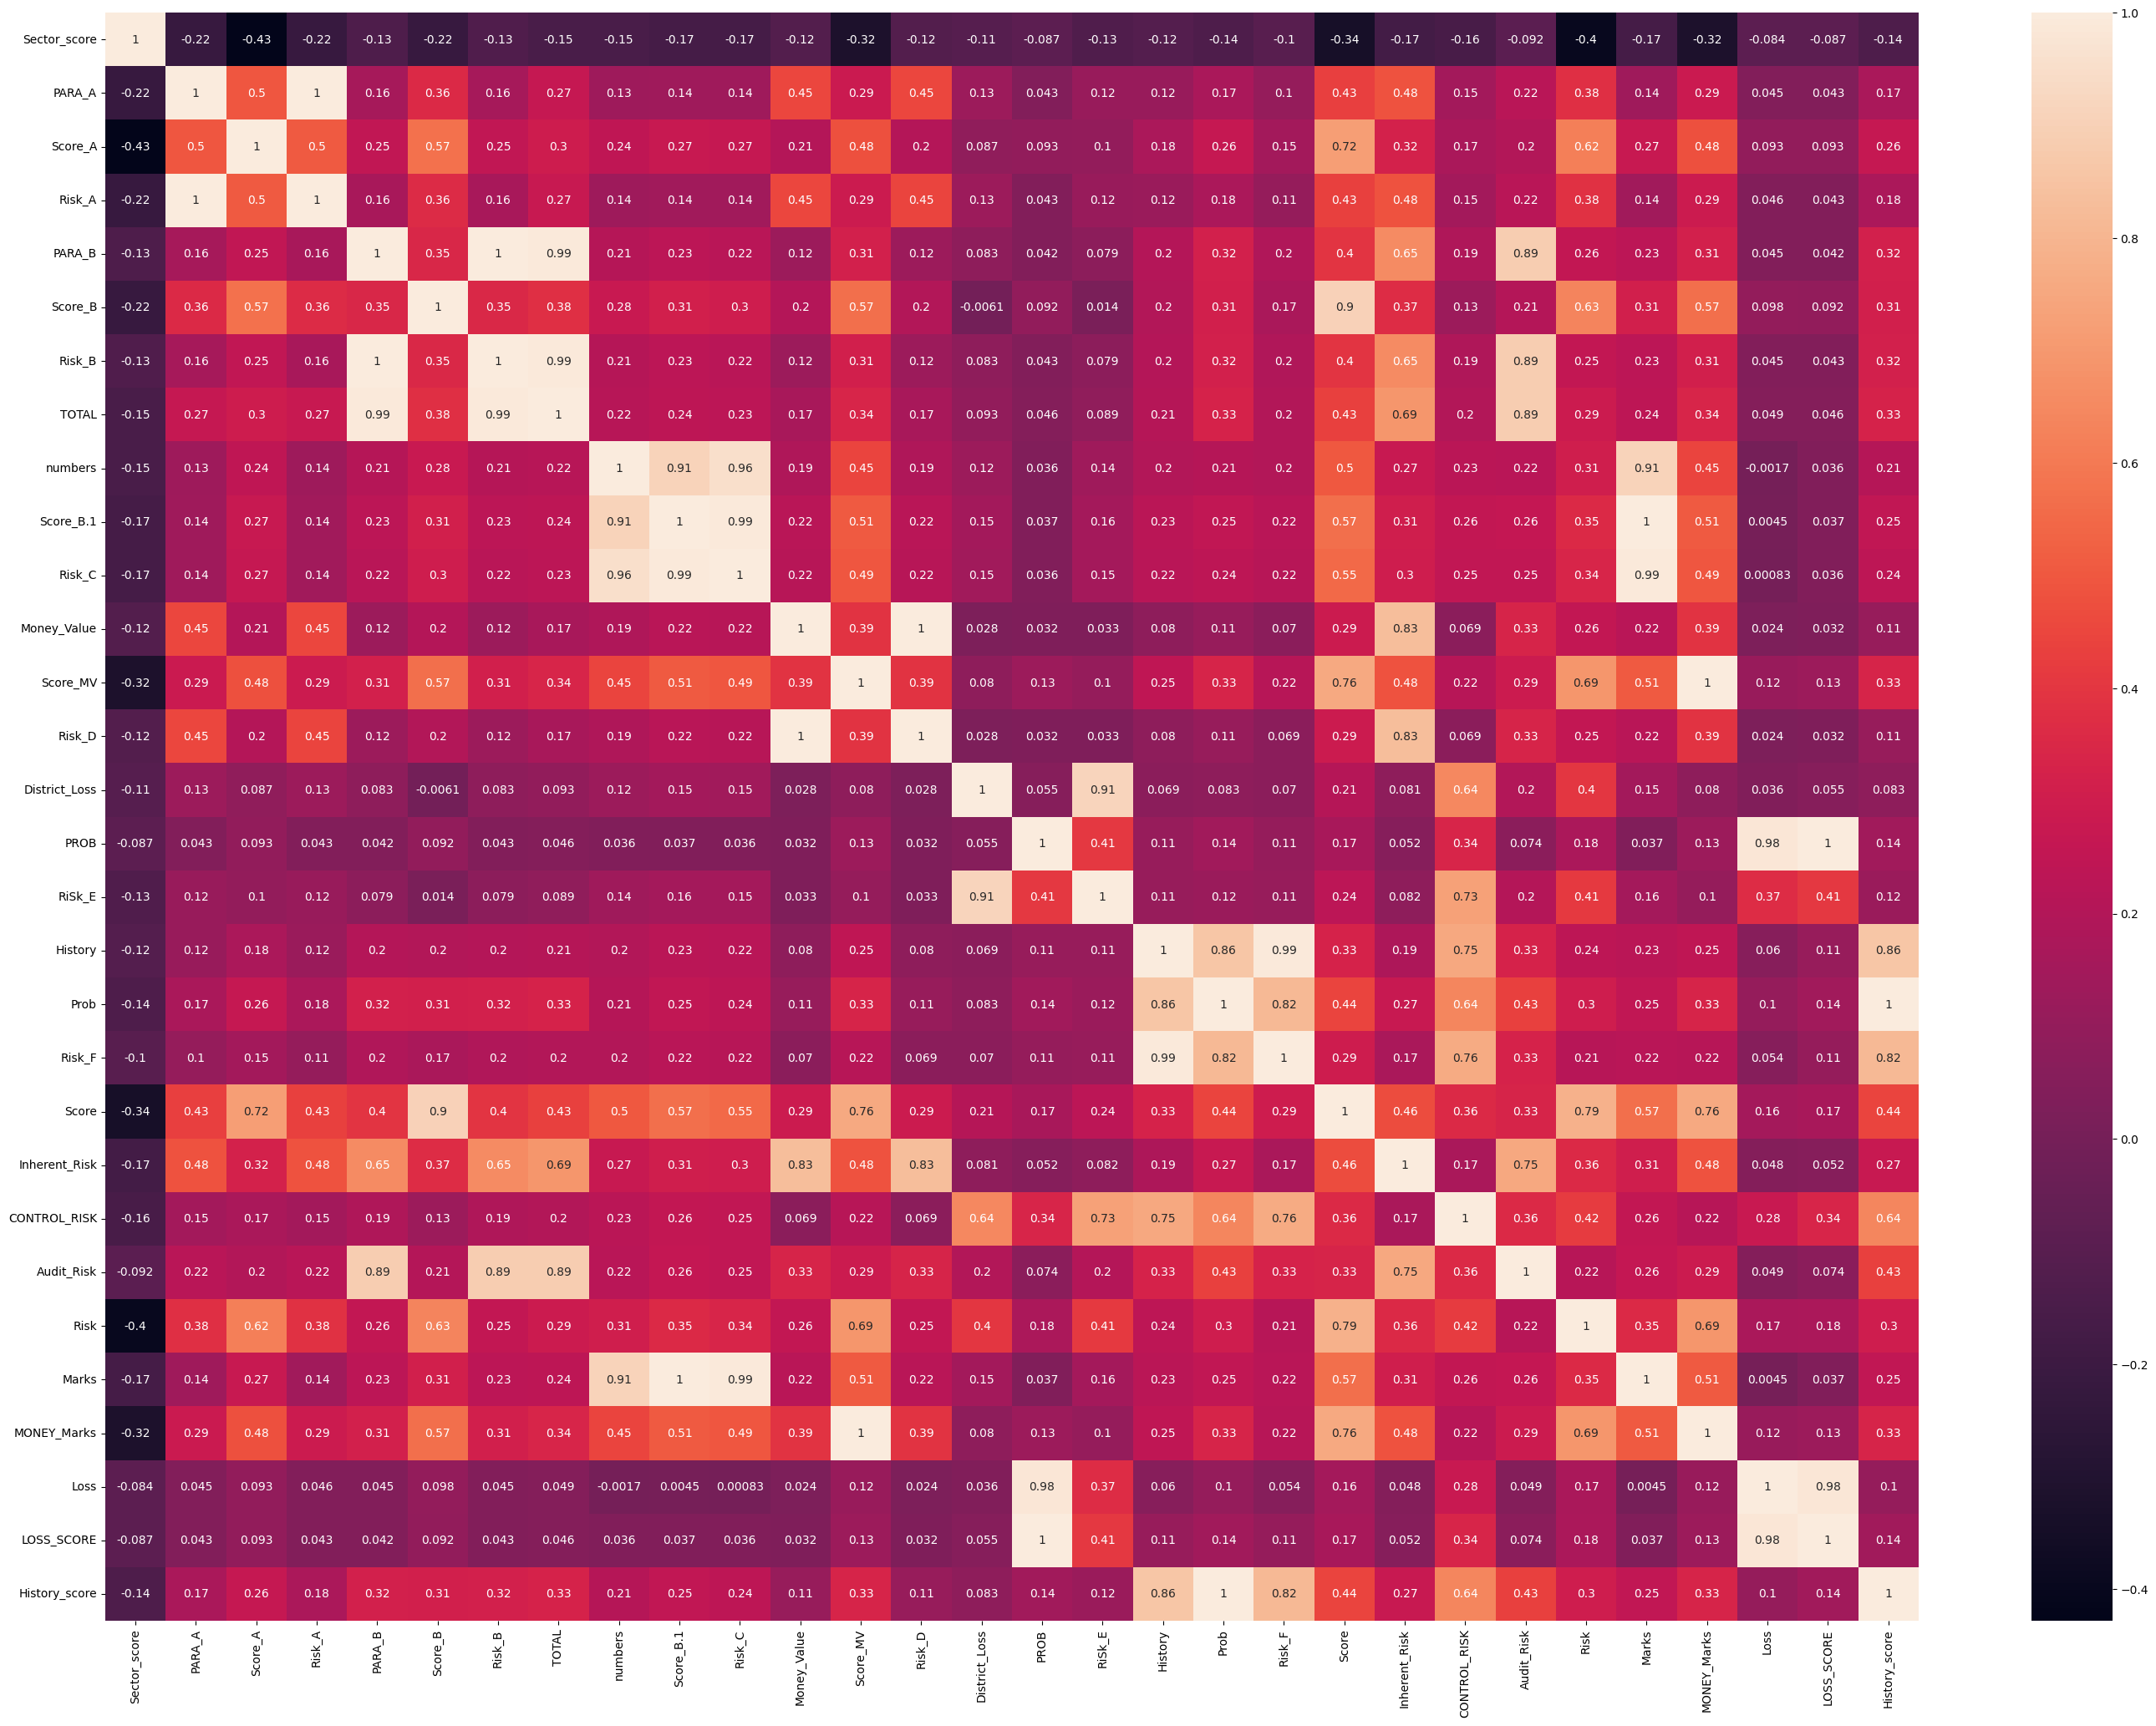

In [19]:
plt.figure(figsize=(35,25))
sns.heatmap(dataset.corr(), annot=True)

In [18]:
dataset.drop(columns=['Detection_Risk','LOCATION_ID'],inplace=True,axis=1)

In [20]:
print(sum(dataset['Score_B.1']*10==dataset['Marks']))
print(sum(dataset['History_score']/10==dataset['Prob']))
print(sum(dataset['LOSS_SCORE']/10==dataset['PROB']))
print(sum(dataset['Score_MV']*10==dataset['MONEY_Marks']))
print(sum(dataset['Loss']==dataset['LOSS_SCORE']-2))

772
772
772
772
750


In [21]:
dataset.drop(columns=['Score_B.1','Prob', 'PROB', 'Score_MV','LOSS_SCORE'],inplace=True,axis=1)

In [22]:

a=dataset['Risk_A']+dataset['Risk_B']+dataset['Risk_C']+dataset['Risk_D']+dataset['RiSk_E']+dataset['Risk_F']
df=pd.concat([a,dataset['Inherent_Risk']],axis=1)
df=df.round(3)
sum(df[0]==df['Inherent_Risk'])


# for 773 rows out of 775 Sum of Risk A to RIsk F equals Inherent RIsk

770

In [23]:
dataset.drop(columns=['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F'],axis=1, inplace=True)

In [24]:

dataset.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL',
       'numbers', 'Money_Value', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk', 'Marks',
       'MONEY_Marks', 'Loss', 'History_score'],
      dtype='object')

In [25]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 0 to 775
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   772 non-null    float64
 1   PARA_A         772 non-null    float64
 2   Score_A        772 non-null    float64
 3   PARA_B         772 non-null    float64
 4   Score_B        772 non-null    float64
 5   TOTAL          772 non-null    float64
 6   numbers        772 non-null    float64
 7   Money_Value    772 non-null    float64
 8   District_Loss  772 non-null    int64  
 9   History        772 non-null    int64  
 10  Score          772 non-null    float64
 11  Inherent_Risk  772 non-null    float64
 12  CONTROL_RISK   772 non-null    float64
 13  Audit_Risk     772 non-null    float64
 14  Risk           772 non-null    int64  
 15  Marks          772 non-null    float64
 16  MONEY_Marks    772 non-null    float64
 17  Loss           772 non-null    float64
 18  History_score  

In [26]:
dataset.describe()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,Loss,History_score
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,20.209404,2.460869,0.352073,10.855947,0.313731,13.284950,5.068005,14.191093,2.507772,0.104922,2.706218,17.764268,0.573575,7.203708,0.395078,2.238342,2.914508,0.029793,2.168394
std,24.322215,5.691631,0.174163,50.207317,0.170048,51.437422,0.265089,66.730436,1.231321,0.532353,0.859652,54.869671,0.445559,38.764503,0.489184,0.805417,1.600242,0.184745,0.681523
min,1.850000,0.000000,0.200000,0.000000,0.200000,0.000000,5.000000,0.000000,2.000000,0.000000,2.000000,1.400000,0.400000,0.280000,0.000000,2.000000,2.000000,0.000000,2.000000
25%,2.370000,0.207500,0.200000,0.000000,0.200000,0.555000,5.000000,0.000000,2.000000,0.000000,2.000000,1.584000,0.400000,0.316800,0.000000,2.000000,2.000000,0.000000,2.000000
50%,3.890000,0.880000,0.200000,0.415000,0.200000,1.395000,5.000000,0.090000,2.000000,0.000000,2.400000,2.220000,0.400000,0.579600,0.000000,2.000000,2.000000,0.000000,2.000000
75%,55.570000,2.482500,0.600000,4.170000,0.400000,7.767500,5.000000,5.630000,2.000000,0.000000,3.400000,10.782000,0.400000,3.262500,1.000000,2.000000,4.000000,0.000000,2.000000
max,59.850000,85.000000,0.600000,1264.630000,0.600000,1268.910000,9.000000,935.030000,6.000000,9.000000,5.200000,801.262000,5.800000,961.514400,1.000000,6.000000,6.000000,2.000000,6.000000


In [27]:

dataset.shape

(772, 19)

<Axes: >

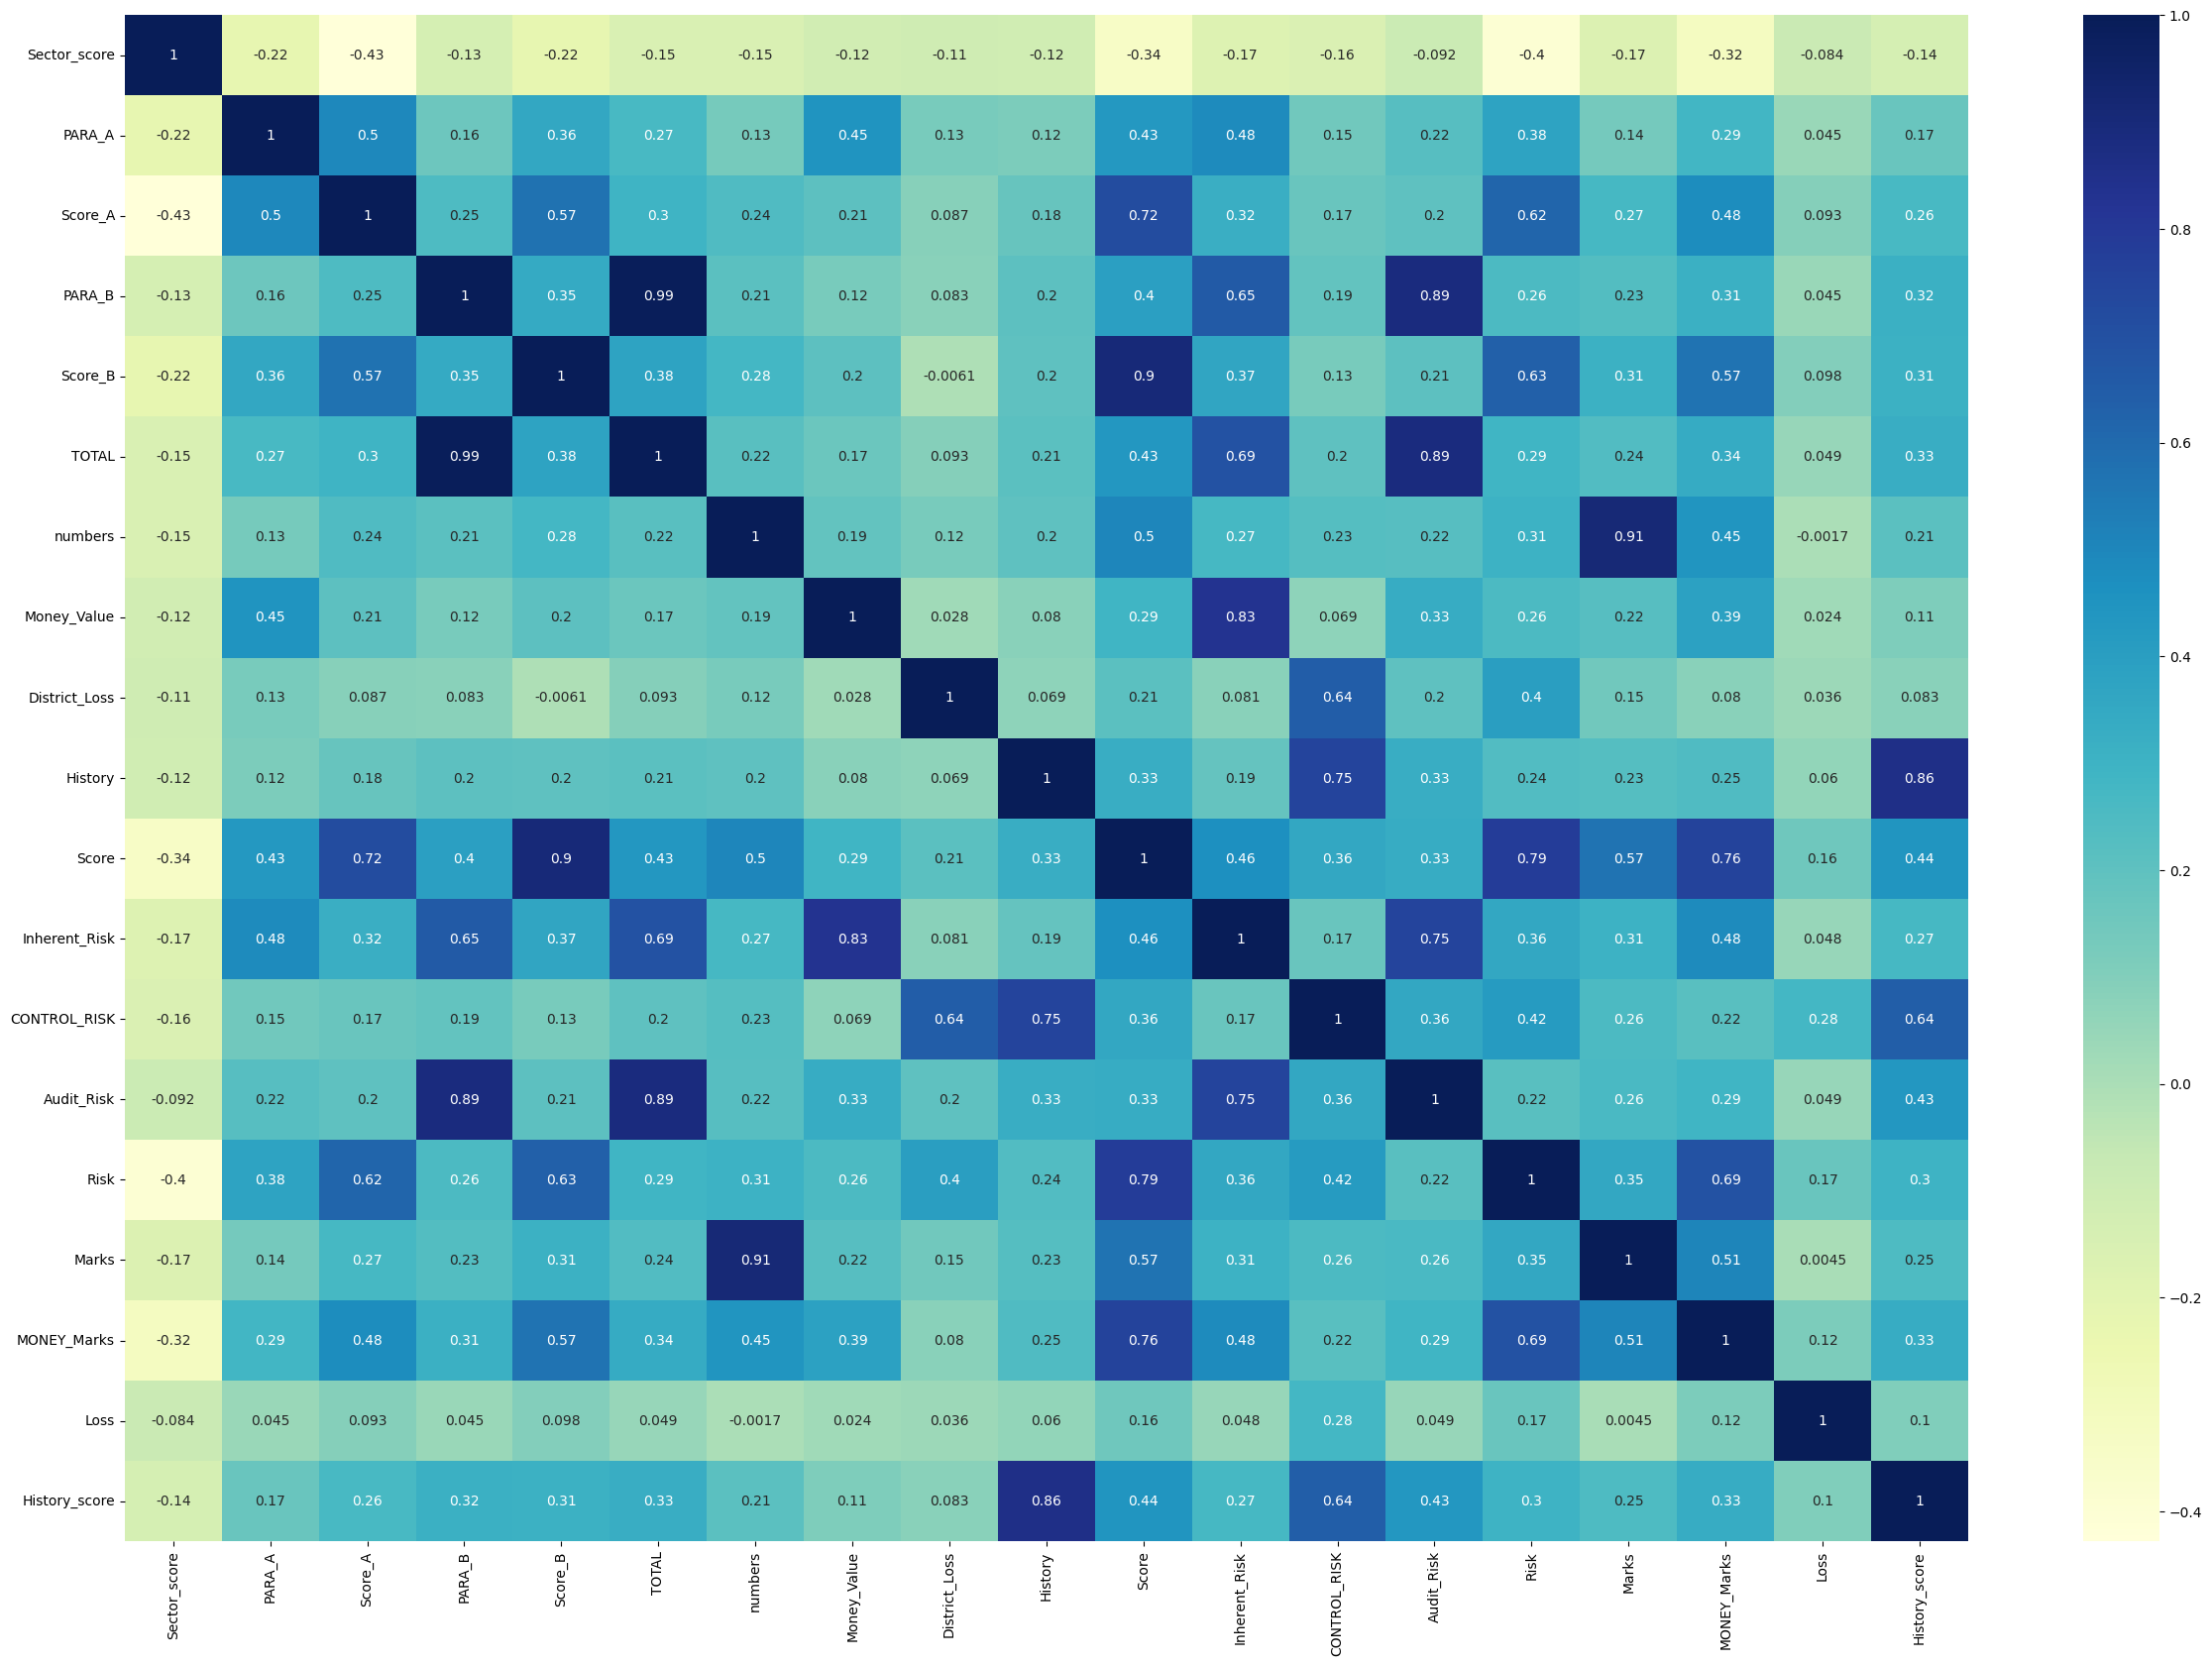

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(dataset.corr(), annot=True,  cmap="YlGnBu")


array([[<Axes: title={'center': 'District_Loss'}>,
        <Axes: title={'center': 'History'}>],
       [<Axes: title={'center': 'Risk'}>, <Axes: >]], dtype=object)

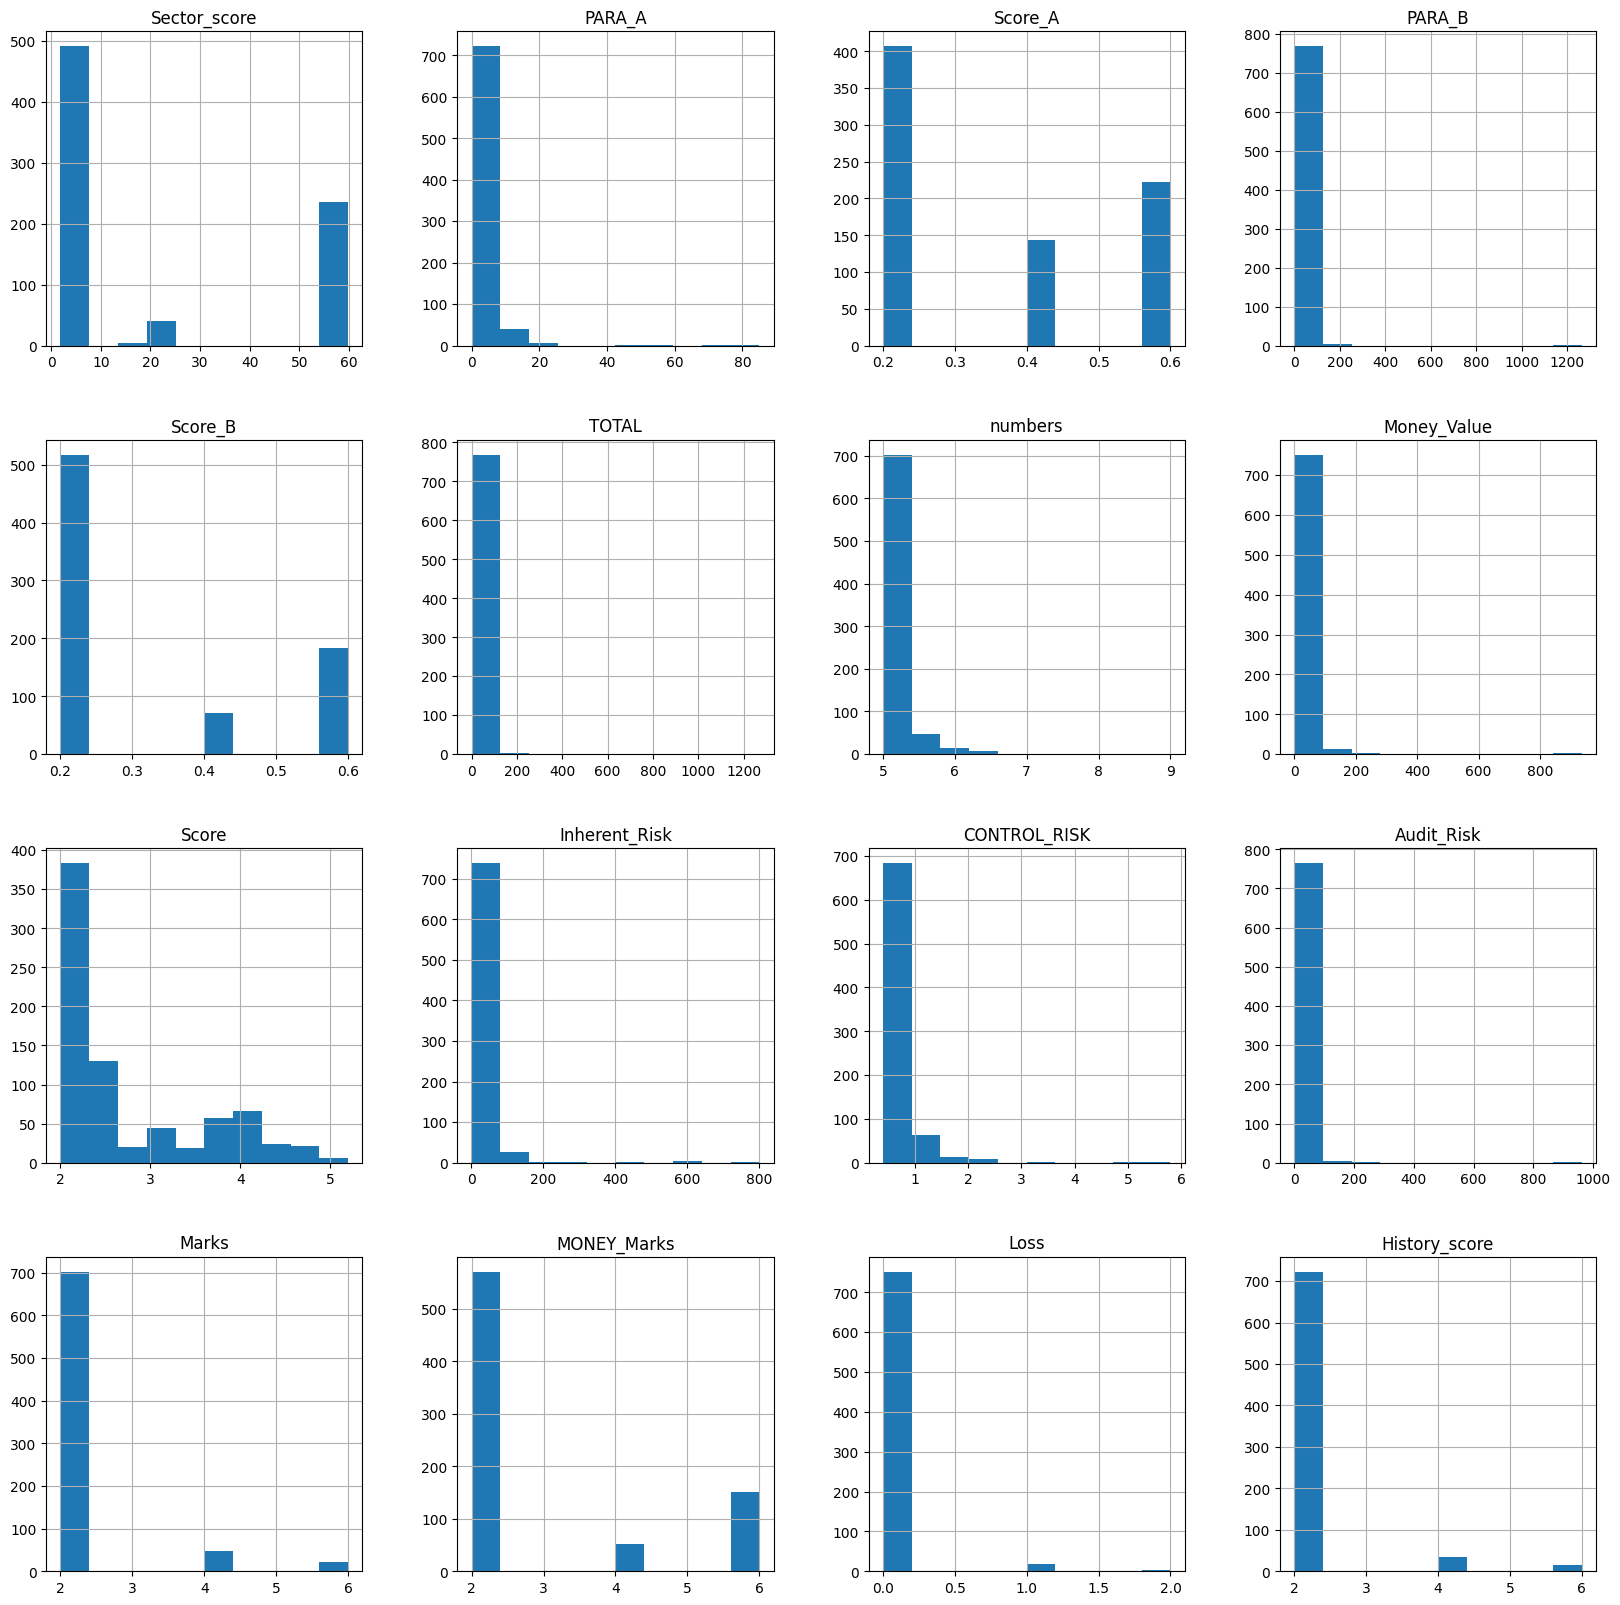

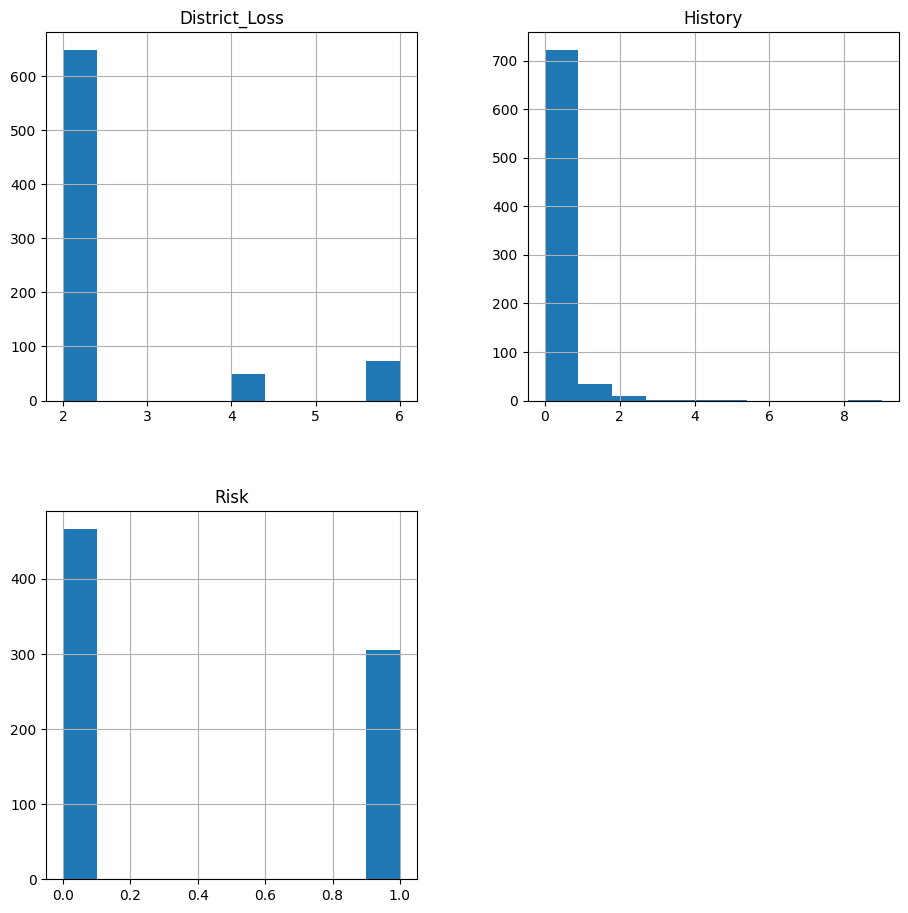

In [29]:
dataset[dataset.dtypes[(dataset.dtypes=="float")].index.values].hist(figsize=[20,20])
dataset[dataset.dtypes[(dataset.dtypes=="int64")].index.values].hist(figsize=[11,11])

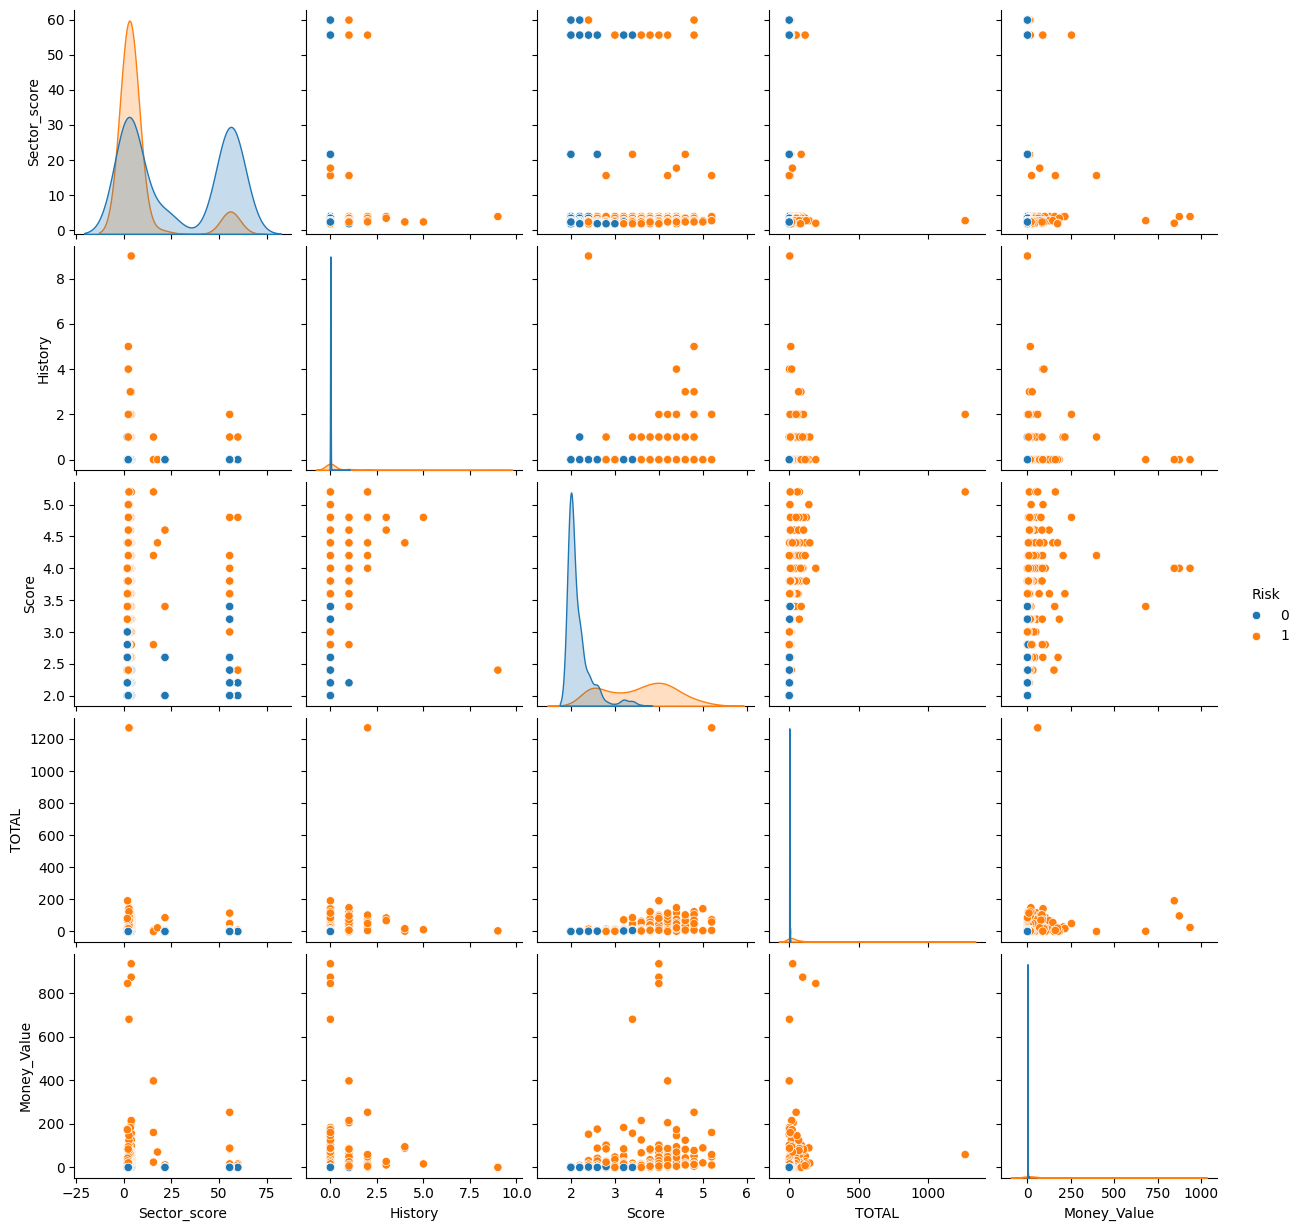

In [30]:
sns.pairplot(dataset, hue = 'Risk', vars = ['Sector_score','History','Score', 'TOTAL', 'Money_Value'])


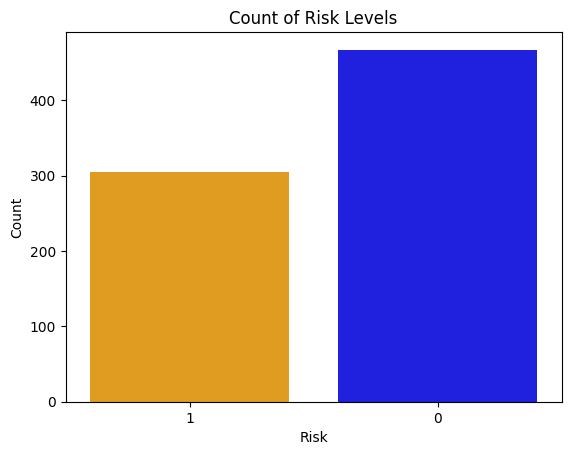

In [38]:
dataset['Risk'] = dataset['Risk'].astype(str)

custom_colors = {"0": "blue", "1": "orange"}

sns.countplot(x='Risk', data=dataset, palette=custom_colors)

plt.title("Count of Risk Levels")
plt.xlabel("Risk")
plt.ylabel("Count")

plt.show()


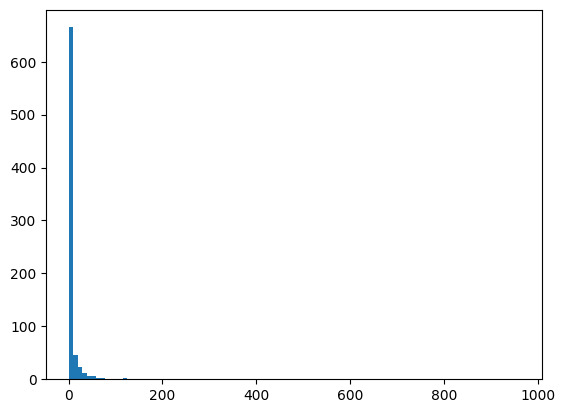

In [39]:
plt.hist(dataset['Audit_Risk'],bins=100)
plt.show()

In [40]:

dataset=dataset[dataset['Audit_Risk']<100]
X=dataset.drop(columns=['Audit_Risk','Risk'],axis=1)
y=dataset['Audit_Risk']

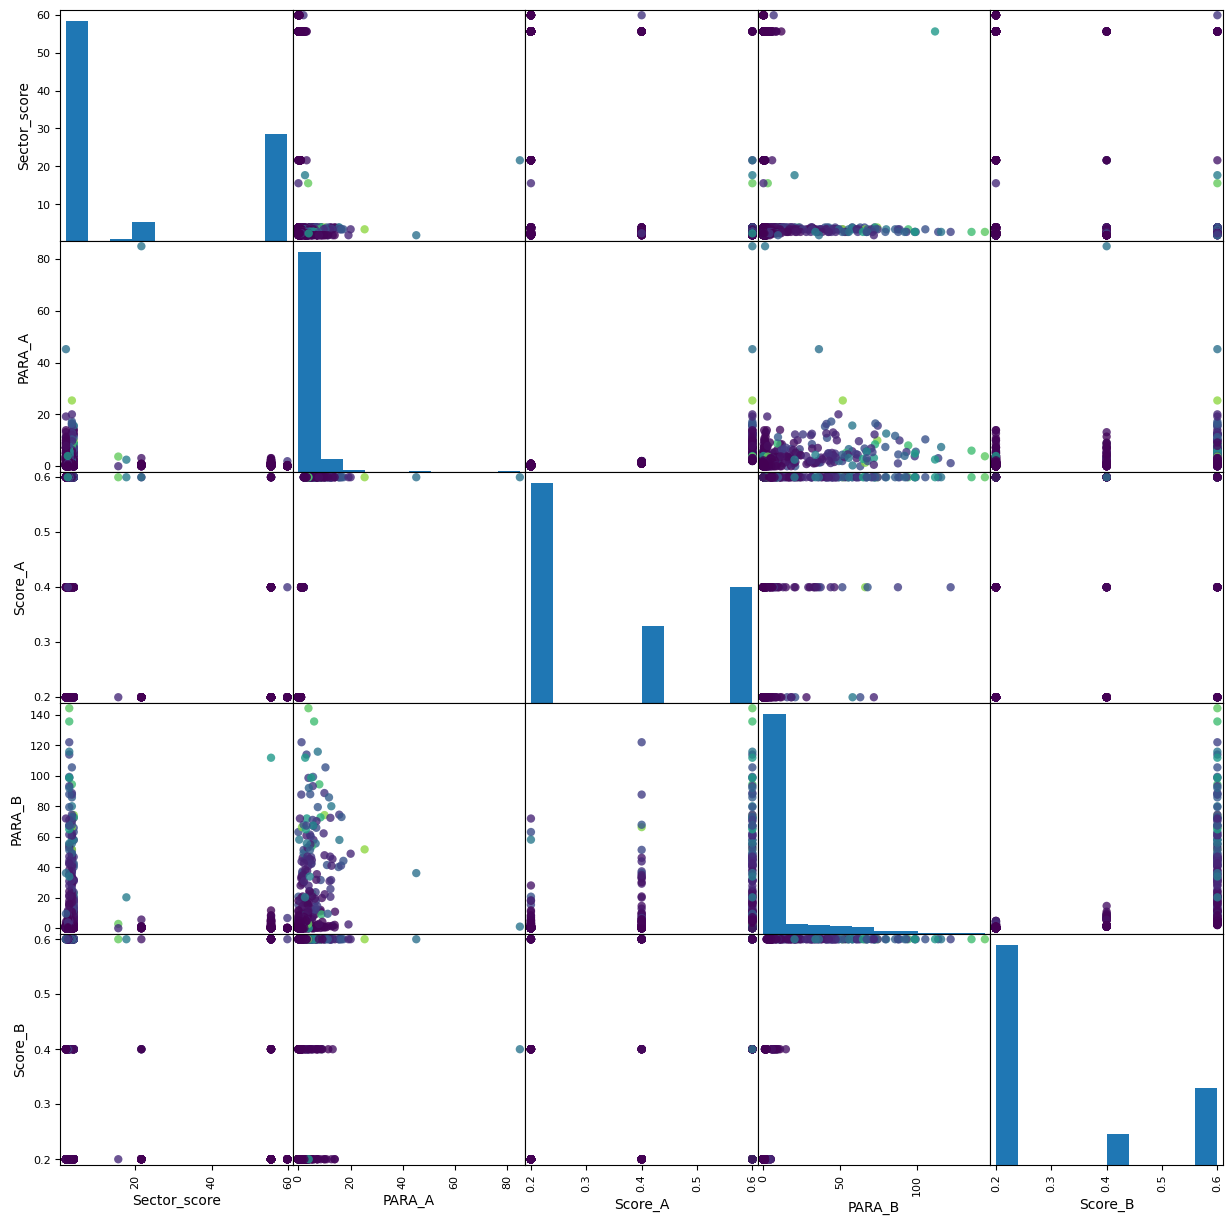

In [41]:
from pandas.plotting import scatter_matrix
attributes = X.columns.values[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')
plt.show()

Step - 3 Model Training and Evaluation
Regression Task

In [42]:

X=dataset.drop(columns=['Audit_Risk','Risk'],axis=1)
y=dataset['Audit_Risk']

In [43]:

X.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Marks,MONEY_Marks,Loss,History_score
0,3.89,4.18,0.6,2.50,0.2,6.68,5.0,3.38,2,0,2.4,8.574,0.4,2.0,2.0,0.0,2.0
1,3.89,0.00,0.2,4.83,0.2,4.83,5.0,0.94,2,0,2.0,2.554,0.4,2.0,2.0,0.0,2.0
2,3.89,0.51,0.2,0.23,0.2,0.74,5.0,0.00,2,0,2.0,1.548,0.4,2.0,2.0,0.0,2.0
3,3.89,0.00,0.2,10.80,0.6,10.80,6.0,11.75,2,0,4.4,17.530,0.4,6.0,6.0,0.0,2.0
4,3.89,0.00,0.2,0.08,0.2,0.08,5.0,0.00,2,0,2.0,1.416,0.4,2.0,2.0,0.0,2.0


In [44]:
y.head()

,Audit_Risk
0,1.7148
1,0.5108
2,0.3096
3,3.5060
4,0.2832


In [45]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
X_train_unscaled.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Marks,MONEY_Marks,Loss,History_score
283,2.37,3.61,0.6,2.130,0.6,5.740,5.0,5.41,2,2,4.4,8.6080,2.0,2.0,4.0,1.0,6.0
459,1.85,7.07,0.6,0.720,0.2,7.790,5.0,0.00,2,0,2.4,5.7860,0.4,2.0,2.0,0.0,2.0
336,2.37,0.01,0.2,0.007,0.2,0.017,5.0,0.00,2,0,2.0,1.4034,0.4,2.0,2.0,0.0,2.0
644,55.57,0.49,0.2,0.000,0.2,0.490,5.0,0.00,2,0,2.0,1.4980,0.4,2.0,2.0,0.0,2.0
184,3.41,0.43,0.2,0.000,0.2,0.430,5.0,0.00,2,0,2.0,1.4860,0.4,2.0,2.0,0.0,2.0


from matplotlib import pyplot as plt
_df_0['Sector_score'].plot(kind='hist', bins=20, title='Sector_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PARA_A'].plot(kind='hist', bins=20, title='PARA_A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Score_A'].plot(kind='hist', bins=20, title='Score_A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PARA_B'].plot(kind='hist', bins=20, title='PARA_B')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Sector_score', y='PARA_A', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PARA_A', y='Score_A', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Score_A', y='PARA_B', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PARA_B', y='Score_B', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers']
  ys = series['Sector_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('numbers', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers')
_ = plt.ylabel('Sector_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers']
  ys = series['PARA_A']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('numbers', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers')
_ = plt.ylabel('PARA_A')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers']
  ys = series['Score_A']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('numbers', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers')
_ = plt.ylabel('Score_A')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers']
  ys = series['PARA_B']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('numbers', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers')
_ = plt.ylabel('PARA_B')

from matplotlib import pyplot as plt
_df_12['Sector_score'].plot(kind='line', figsize=(8, 4), title='Sector_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['PARA_A'].plot(kind='line', figsize=(8, 4), title='PARA_A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Score_A'].plot(kind='line', figsize=(8, 4), title='Score_A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PARA_B'].plot(kind='line', figsize=(8, 4), title='PARA_B')
plt.gca().spines[['top', 'right']].set_visible(False)

In [47]:

X_train_unscaled.shape

(611, 17)

In [48]:
y_train.shape

(611,)


Scaling the Data
Scaling the data using StandardScaler
Standard Scalar works well with Regression

(-1.0, 2.5)

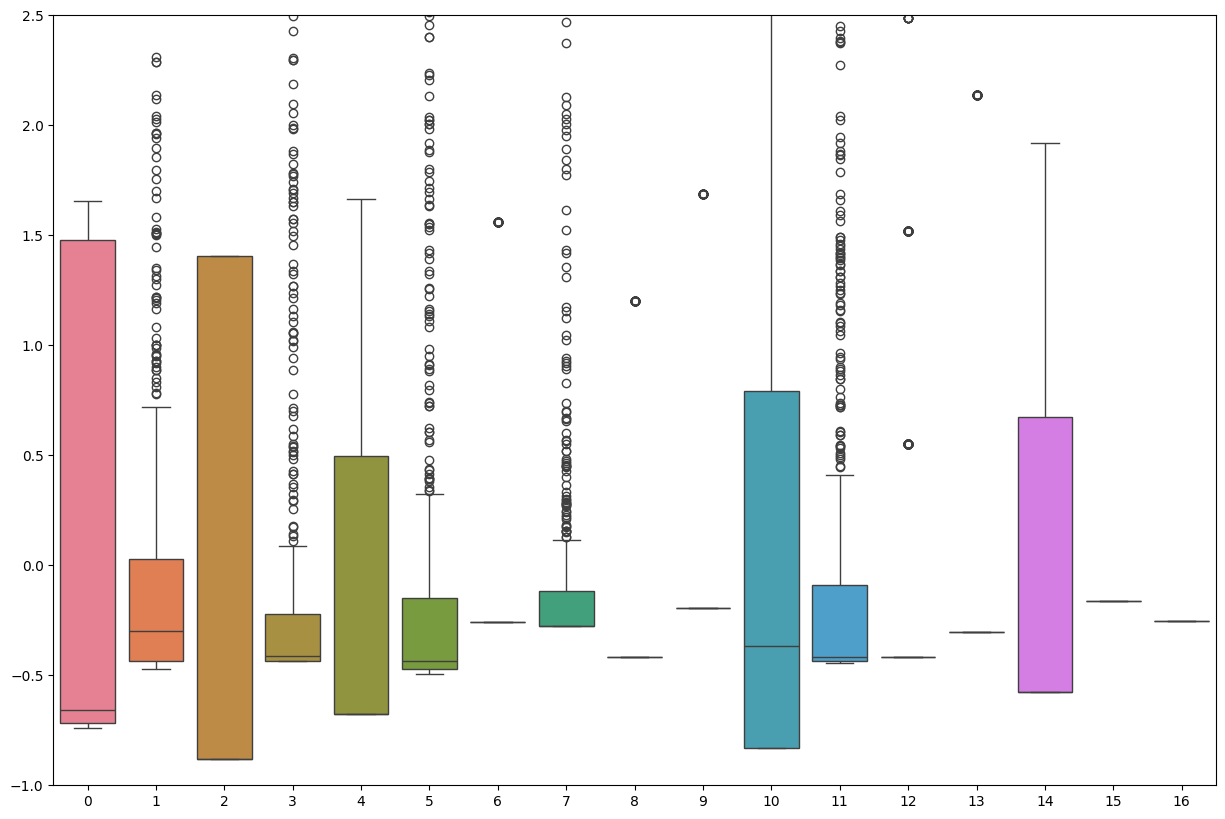

In [49]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train_unscaled)
X_test=standard_scaler.transform(X_test_unscaled)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-1,2.5)

Applying different Regression models


i) Bagging

. Training on a single Decision Tree and then using Aggregate Bootstraping

In [50]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
bag_reg = BaggingRegressor(dt, n_estimators=500, max_samples=200, bootstrap=True, random_state=0,oob_score=True)

# 500 patches out of the dataset
# max_samples =100, number of samples in a classifier
# bootstrap = bagging/pasting ; =True is bagging i.e. with replacement select the samples
# oob: the left out sample score
# On an average only 63% of the data is selected in total

bag_reg.fit(X_train, y_train)
dt.fit(X_train,y_train)
y_pred = bag_reg.predict(X_test)

print('Model-01 using Decision Tree for Bagging\n')
print('Train score with bagging: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with bagging: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score decision Tree: {:.2f}\n'.format(dt.score(X_test, y_test)))
print('Out of Bag score: {:.2f}'.format(bag_reg.oob_score_))

Model-01 using Decision Tree for Bagging

Train score with bagging: 0.93
Test score with bagging: 0.91

Train score decision Tree: 1.00
Test score decision Tree: 0.98

Out of Bag score: 0.87


2. Finding best parameteters for Bagging of Decision Tree Regressor using GridSearch Cross Validation

In [52]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(random_state=0),bootstrap=True, oob_score=True, random_state=0),
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 500}



3. Visualizing the Cross validation Results

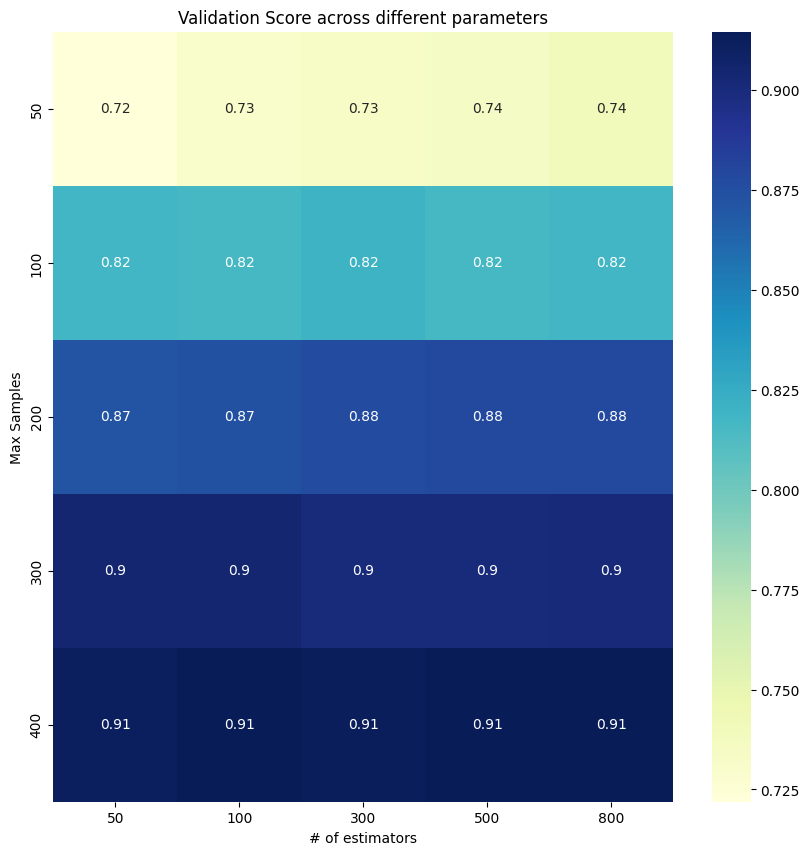

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(scores, annot=True, xticklabels=param_dist['n_estimators'], yticklabels=param_dist['max_samples'], cmap="YlGnBu")

plt.xlabel('# of estimators')
plt.ylabel('Max Samples')
plt.title('Validation Score across different parameters')
plt.show()


4. Fitting the model with best parameters and Visualizing how it fits the data

In [60]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

Train score: 0.97318888516724
Test score: 0.9539889958786426


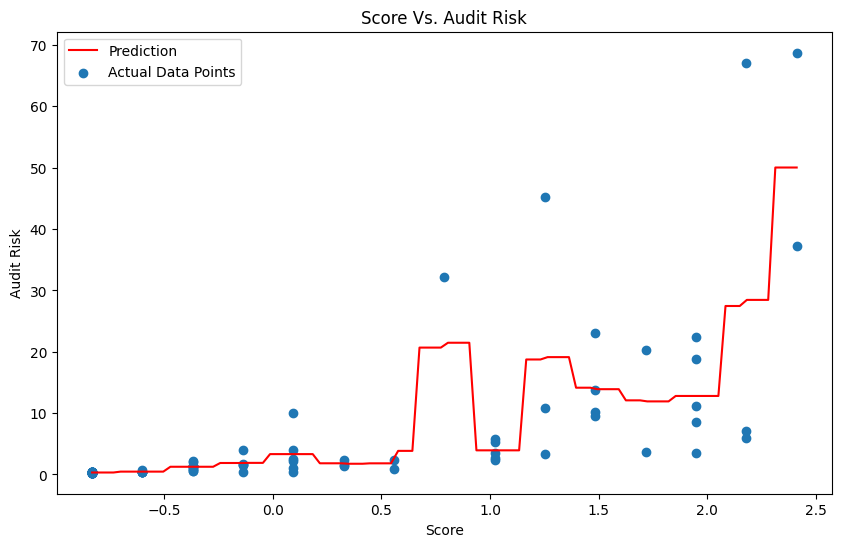

In [61]:
X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators=300, bootstrap=True,
                           random_state=0,oob_score=True)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

Bagging with KNN
1. Training on a single KNN and then using Aggregate Bootstraping

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(3)
bag_reg = BaggingRegressor(knn, n_estimators=500, bootstrap=True, random_state=0,oob_score=True)

bag_reg.fit(X_train, y_train)
knn.fit(X_train,y_train)

print('Model-02 using KNN for Bagging\n')
print('Train score with bagging: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with bagging: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score KNN: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test score KNN: {:.2f}\n'.format(knn.score(X_test, y_test)))
print('Out of Bag score: {:.2f}'.format(bag_reg.oob_score_))

Model-02 using KNN for Bagging

Train score with bagging: 0.89
Test score with bagging: 0.86

Train score KNN: 0.87
Test score KNN: 0.87

Out of Bag score: 0.75


2. Finding best parameteters for Bagging of KNN Regressor using GridSearch Cross Validation

In [63]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(KNeighborsRegressor(3),bootstrap=True, oob_score=True, random_state=0),
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 500}



3. Visualizing the Cross validation Results

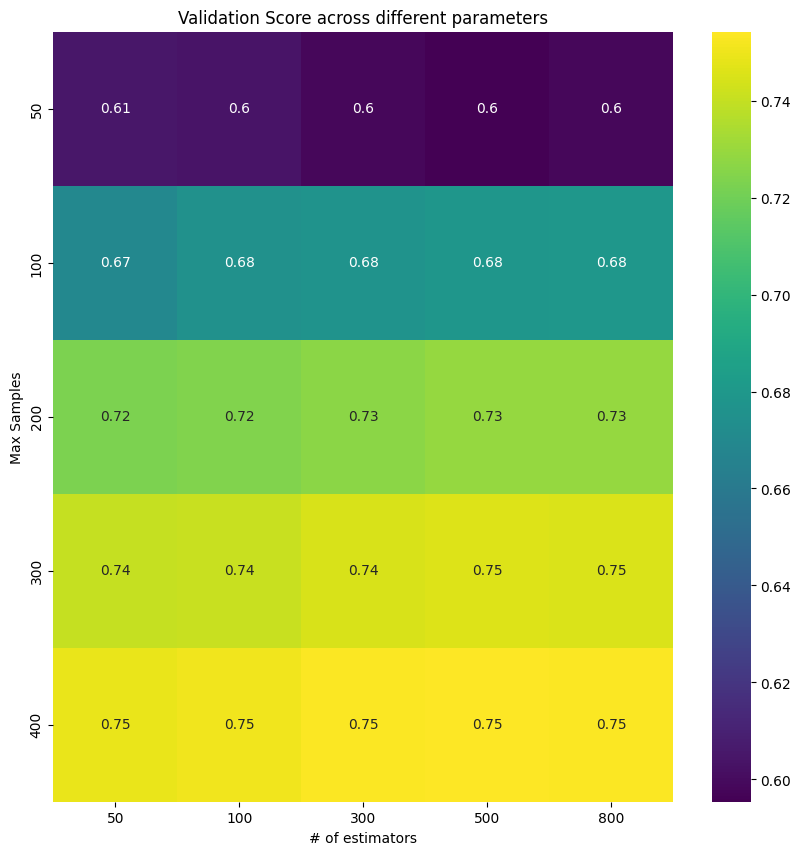

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(scores, annot=True, xticklabels=param_dist['n_estimators'], yticklabels=param_dist['max_samples'], cmap="viridis")

plt.xlabel('# of estimators')
plt.ylabel('Max Samples')
plt.title('Validation Score across different parameters')
plt.show()

4. Fitting the model with best parameters and Visualizing how it fits the data

Train score: 0.8451766183305985
Test score: 0.8333821604392752


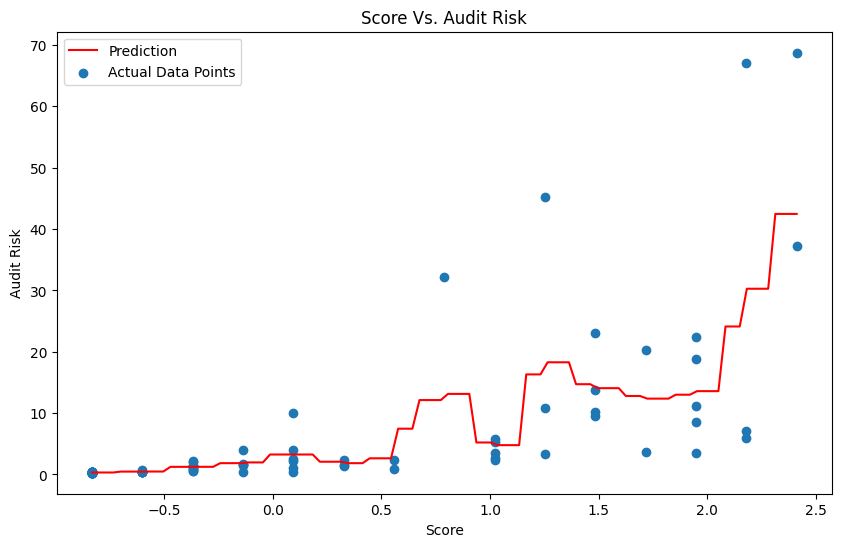

In [66]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(KNeighborsRegressor(3), n_estimators=800, bootstrap=True,
                           random_state=0,oob_score=True)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


 ii) Pasting
Pasting with Decision Tree
1. Training on a single Decision Tree and then using Aggregate Bagging

In [67]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
bag_reg = BaggingRegressor(dt, n_estimators=500, max_samples=200, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
dt.fit(X_train,y_train)
y_pred = bag_reg.predict(X_test)

print('Model-03 using Decision Tree for Pasting\n')
print('Train score with pasting: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with pasting: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score decision Tree: {:.2f}\n'.format(dt.score(X_test, y_test)))

Model-03 using Decision Tree for Pasting

Train score with pasting: 0.94
Test score with pasting: 0.92

Train score decision Tree: 1.00
Test score decision Tree: 0.98



2. Finding best parameteters for Pasting of Decision Tree Regressor using GridSearch Cross Validation

In [69]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(random_state=0),bootstrap=False,random_state=0),
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))


Best parameters {'max_samples': 400, 'n_estimators': 50}



3. Visualizing the Cross validation Results

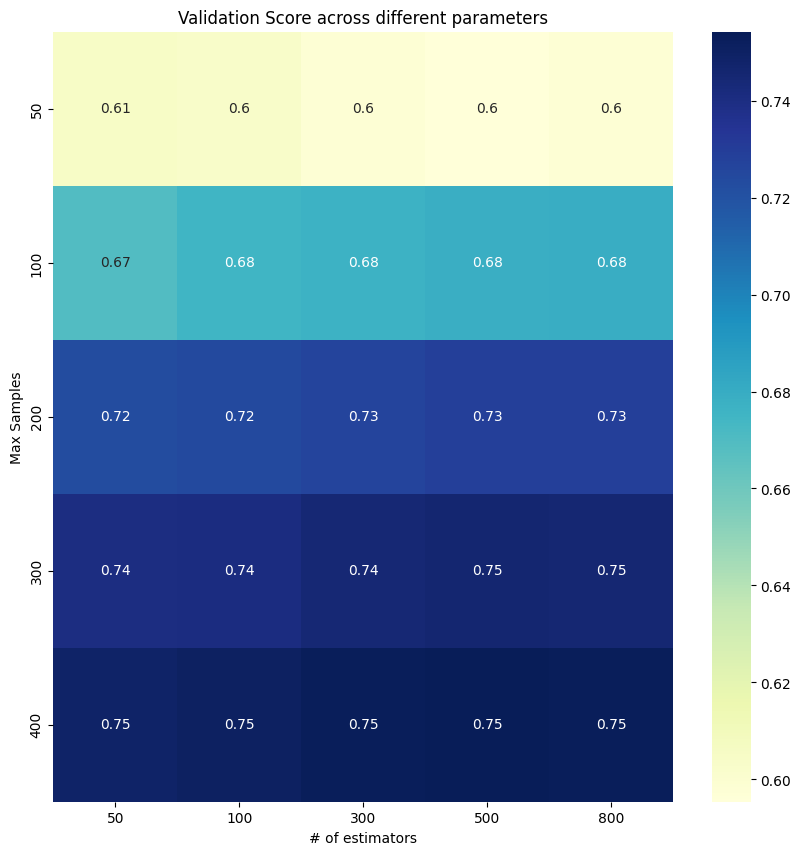

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(scores, annot=True, xticklabels=param_dist['n_estimators'], yticklabels=param_dist['max_samples'], cmap="YlGnBu")

plt.xlabel('# of estimators')
plt.ylabel('Max Samples')
plt.title('Validation Score across different parameters')
plt.show()

4. Fitting the model with best parameters and Visualizing how it fits the data

Train score: 0.9900499753064441
Test score: 0.9577895407215254


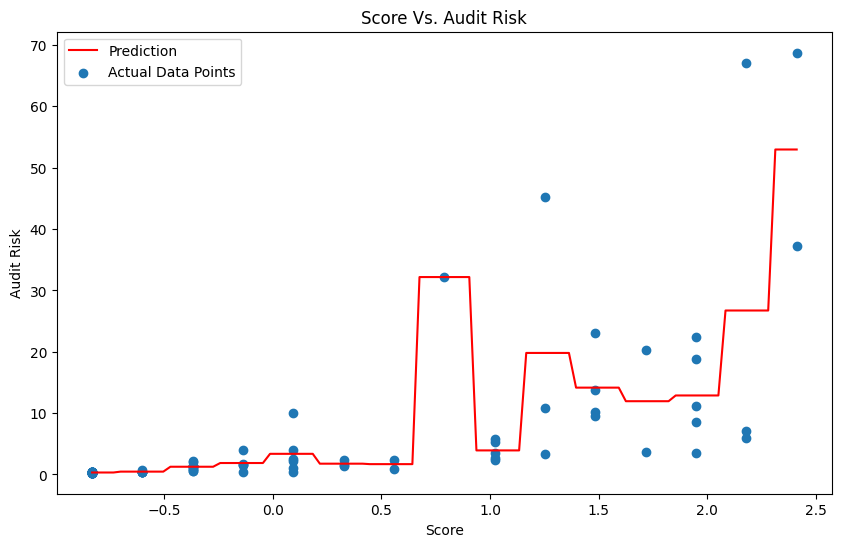

In [72]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators=100, bootstrap=False, random_state=0)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Pasting with KNN
1. Training on a single KNN and then using Pasting

In [73]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(3)
bag_reg = BaggingRegressor(knn, n_estimators=500, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
knn.fit(X_train,y_train)

print('Model-04 using KNN for Pasting\n')
print('Train score with pasting: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with pasting: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score KNN: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test score KNN: {:.2f}\n'.format(knn.score(X_test, y_test)))

Model-04 using KNN for Pasting

Train score with pasting: 0.87
Test score with pasting: 0.87

Train score KNN: 0.87
Test score KNN: 0.87



2. Finding best parameteters for Pasting of KNN Regressor using GridSearch Cross Validation

In [74]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(KNeighborsRegressor(3),bootstrap=False, random_state=0),
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 300}


3. Visualizing the Cross validation Results

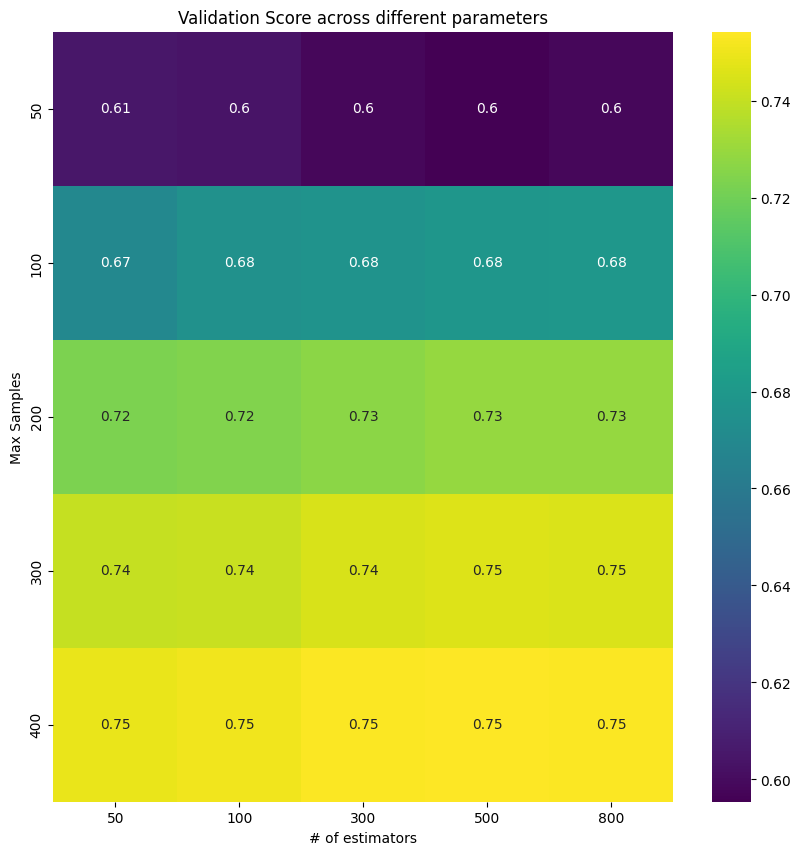

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(scores, annot=True, xticklabels=param_dist['n_estimators'], yticklabels=param_dist['max_samples'], cmap="viridis")

plt.xlabel('# of estimators')
plt.ylabel('Max Samples')
plt.title('Validation Score across different parameters')
plt.show()

4. Fitting the model with best parameters and Visualizing how it fits the data

Train score: 0.8489472171648709
Test score: 0.843610209279601


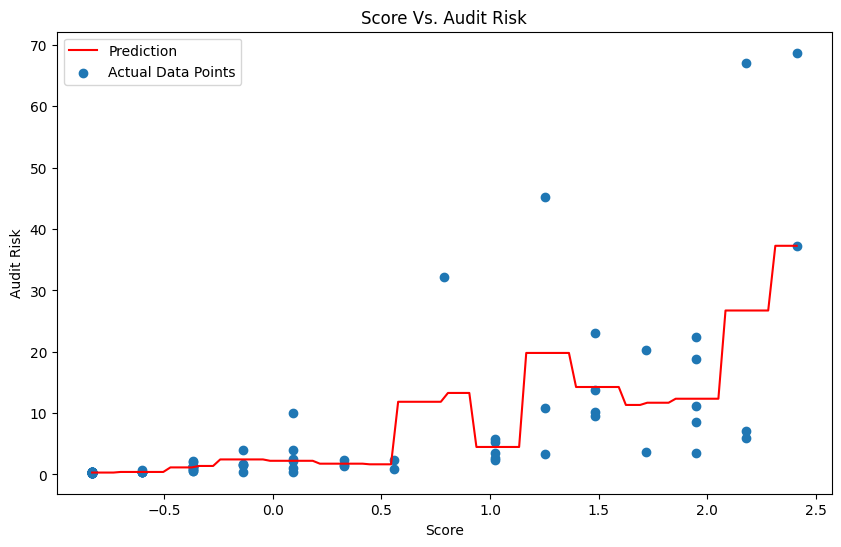

In [76]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(KNeighborsRegressor(3), n_estimators=300, bootstrap=False, random_state=0)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

iii) Adaboost
Adaboost with Decision Tree
1. Training on a single Decision Tree and then using Adaboost

In [77]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.3, random_state=0)
ada_reg.fit(X_train, y_train)

dt=DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
print('Train score with Adaboost: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(ada_reg.score(X_test, y_test)))
print('Train score with Decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score with Decision Tree: {:.2f}'.format(dt.score(X_test, y_test)))

Train score with Adaboost: 0.96
Test score with Adaboost: 0.91

Train score with Decision Tree: 0.90
Test score with Decision Tree: 0.89


2. Finding best parameteters Adaboost using GridSearch Cross Validation

In [78]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,200,300,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), random_state=0),
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.3, 'n_estimators': 50}


3. Visualizing the Cross validation

*   List item
*   List item

Results

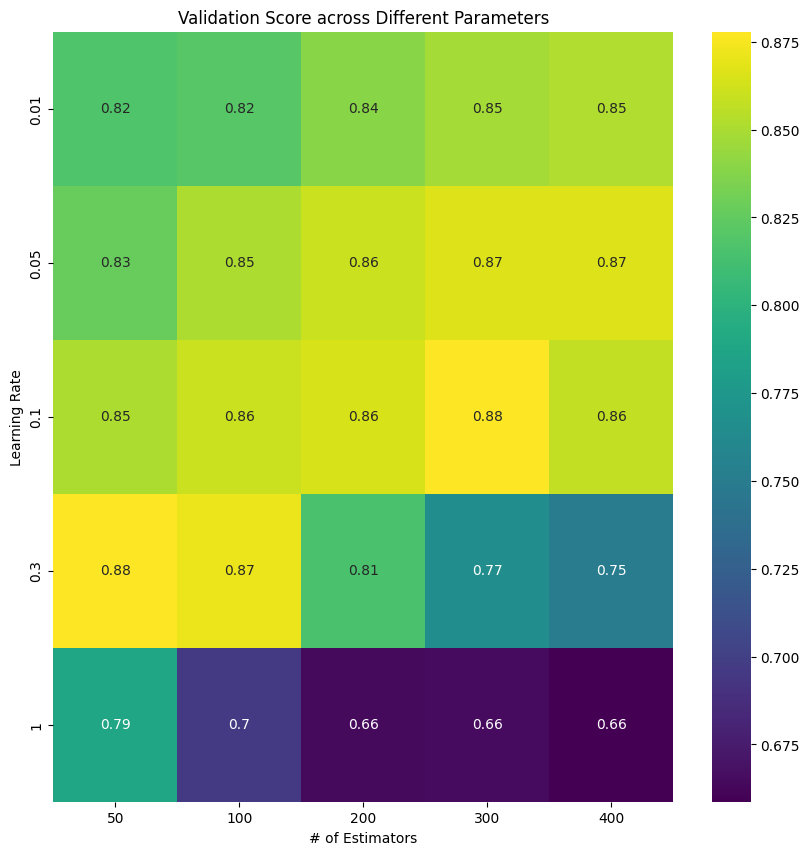

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(scores, annot=True, xticklabels=param_dist['n_estimators'],
            yticklabels=param_dist['learning_rate'], cmap="viridis")

plt.xlabel('# of Estimators')
plt.ylabel('Learning Rate')
plt.title('Validation Score across Different Parameters')
plt.show()


4. Fitting the model with best parameters and Visualizing how it fits the data

Train score: 0.9589925377313062
Test score: 0.9281698461261424


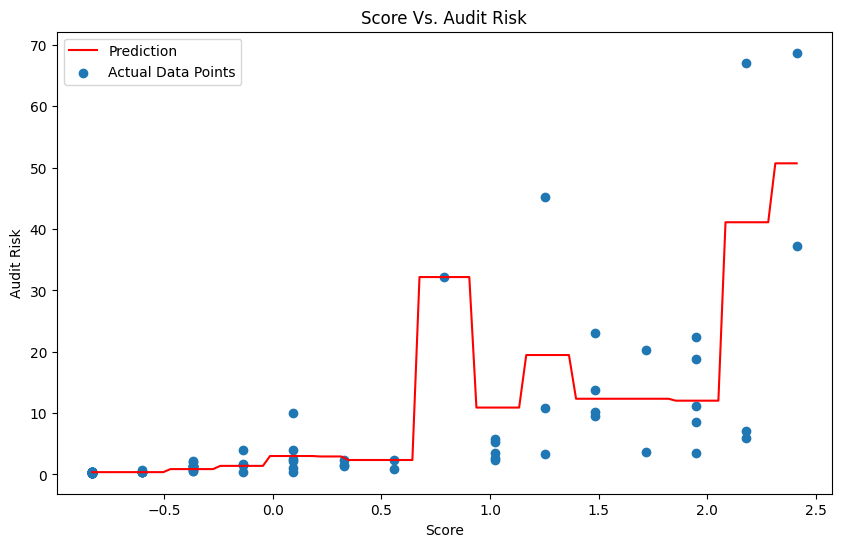

In [82]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=0.3, random_state=0)
ada_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = ada_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Adaboost with Linear SVR
1. Training on Linear SVR and then using Adaboost

In [83]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR

ada_reg = AdaBoostRegressor(LinearSVR(), n_estimators=100, learning_rate=0.1, random_state=0)
ada_reg.fit(X_train, y_train)

svr=LinearSVR(random_state=0)
svr.fit(X_train, y_train)
print('Train score with Adaboost: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(ada_reg.score(X_test, y_test)))
print('Train score with SVR: {:.2f}'.format(svr.score(X_train, y_train)))
print('Test score with SVR: {:.2f}'.format(svr.score(X_test, y_test)))

Train score with Adaboost: 0.88
Test score with Adaboost: 0.84

Train score with SVR: 0.79
Test score with SVR: 0.84


2. Finding best parameteters Adaboost using GridSearch Cross Validation

In [84]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,200,300,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(AdaBoostRegressor(LinearSVR(), random_state=0),param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.01, 'n_estimators': 100}



3. Visualizing the Cross validation Results

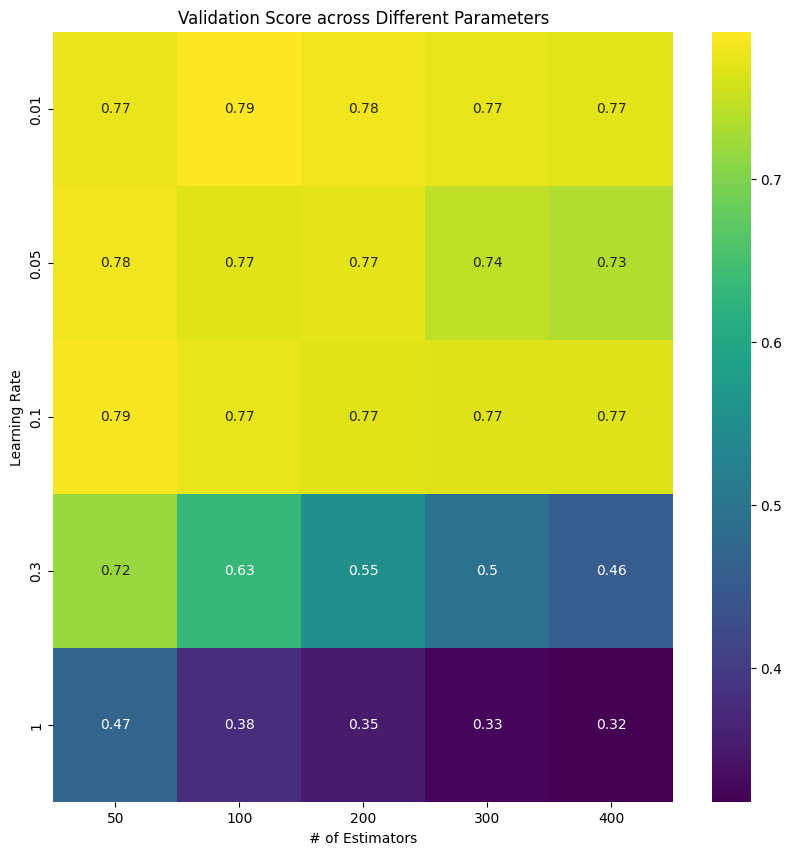

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(scores, annot=True, xticklabels=param_dist['n_estimators'],
            yticklabels=param_dist['learning_rate'], cmap="viridis")

plt.xlabel('# of Estimators')
plt.ylabel('Learning Rate')
plt.title('Validation Score across Different Parameters')
plt.show()


4. Fitting the model with best parameters and Visualizing how it fits the data

Train score: 0.842456083165224
Test score: 0.8719124160679057


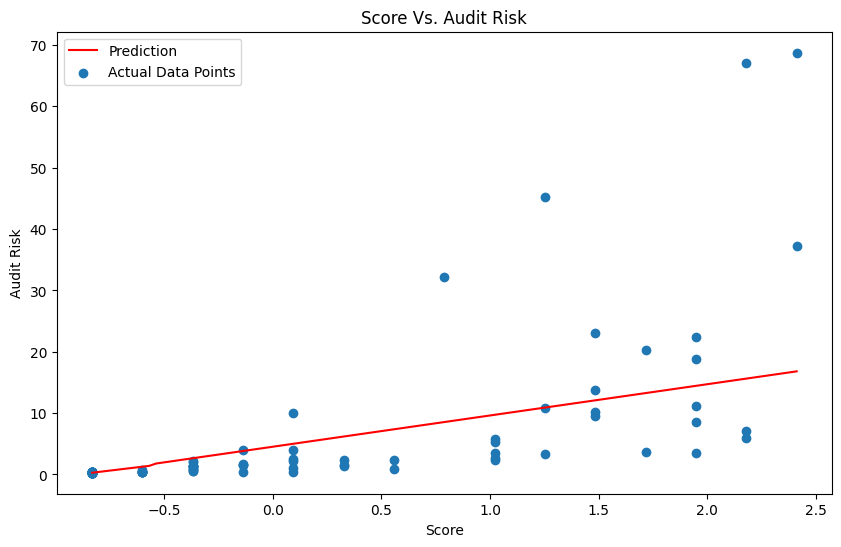

In [88]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

ada_reg = AdaBoostRegressor(LinearSVR(), n_estimators=100, learning_rate=0.3, random_state=0)
ada_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = ada_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

iv) Gradient Boosting
1. Training on Gradient Boosting algorithm

In [89]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

print('Train score with Adaboost: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(gbrt.score(X_test, y_test)))

Train score with Adaboost: 0.92
Test score with Adaboost: 0.92



In [90]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

print('Train score with Adaboost: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(gbrt.score(X_test, y_test)))


Train score with Adaboost: 0.97
Test score with Adaboost: 0.96



2. Finding best parameteters using GridSearch Cross Validation

In [91]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [3,10,100,200,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(GradientBoostingRegressor(random_state=42,max_depth=3),param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))


Best parameters {'learning_rate': 0.05, 'n_estimators': 400}


3. Visualizing the Cross validation Results

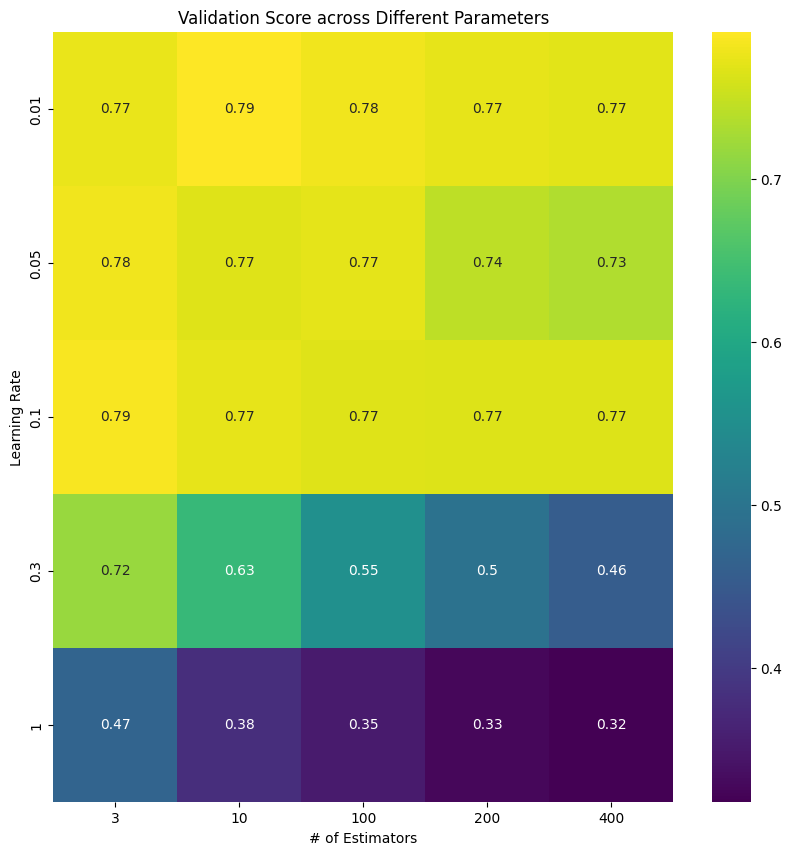

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(scores, annot=True, xticklabels=param_dist['n_estimators'],
            yticklabels=param_dist['learning_rate'], cmap="viridis")

plt.xlabel('# of Estimators')
plt.ylabel('Learning Rate')
plt.title('Validation Score across Different Parameters')
plt.show()


4. Fitting the model with best parameters and Visualizing how it fits the data

Train score: 0.9998696414697485
Test score: 0.9791628124202093


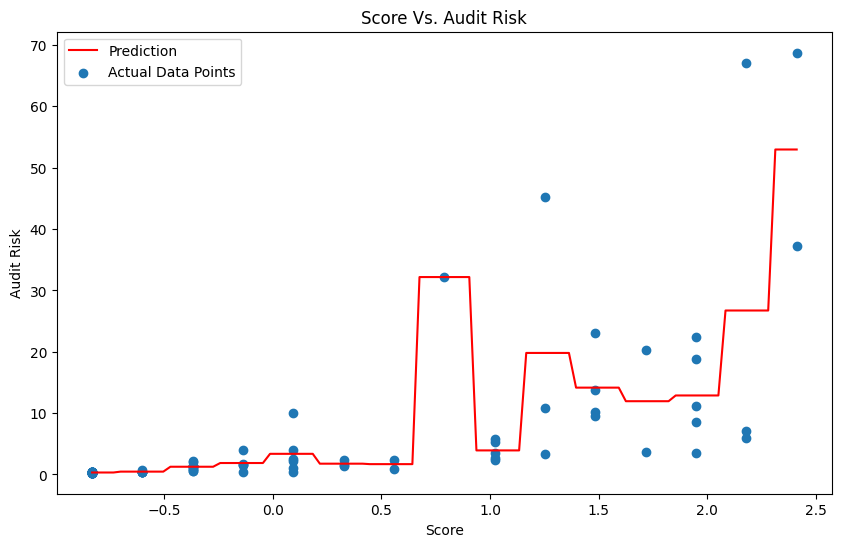

In [93]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

gb = GradientBoostingRegressor(max_depth=3, n_estimators=400, learning_rate=0.1, random_state=42)
gb.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = gb.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

v) XG BOOST

In [94]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Generate Sample Data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1️⃣ Train XGBoost Model with Different Parameters
xgb1 = XGBRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
xgb1.fit(X_train, y_train)

print('Train score (XGBoost, Depth=2, Estimators=3): {:.2f}'.format(xgb1.score(X_train, y_train)))
print('Test score (XGBoost, Depth=2, Estimators=3): {:.2f}\n'.format(xgb1.score(X_test, y_test)))

Train score (XGBoost, Depth=2, Estimators=3): 0.61
Test score (XGBoost, Depth=2, Estimators=3): 0.49



In [95]:
xgb2 = XGBRegressor(max_depth=3, n_estimators=3, learning_rate=1.0, random_state=42)
xgb2.fit(X_train, y_train)

print('Train score (XGBoost, Depth=3, Estimators=3): {:.2f}'.format(xgb2.score(X_train, y_train)))
print('Test score (XGBoost, Depth=3, Estimators=3): {:.2f}\n'.format(xgb2.score(X_test, y_test)))


Train score (XGBoost, Depth=3, Estimators=3): 0.77
Test score (XGBoost, Depth=3, Estimators=3): 0.62



Hyperparameter Tuning using GridSearchCV

In [96]:
param_dist = {
    'n_estimators': [3, 10, 100, 200, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]
}

gs = GridSearchCV(XGBRegressor(random_state=42, max_depth=3), param_grid=param_dist, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

print('Best Parameters:', gs.best_params_)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}


Visualizing Cross-Validation Results

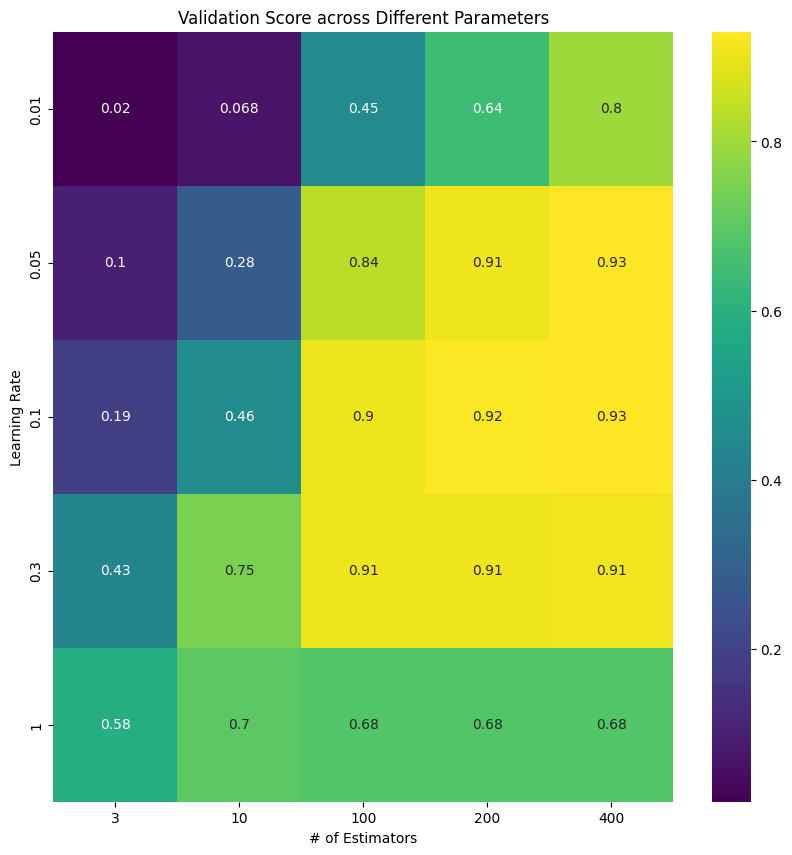

In [97]:
results = gs.cv_results_
scores = np.array(results["mean_test_score"]).reshape(len(param_dist['learning_rate']), len(param_dist['n_estimators']))

plt.figure(figsize=(10,10))
sns.heatmap(scores, annot=True, xticklabels=param_dist['n_estimators'],
            yticklabels=param_dist['learning_rate'], cmap="viridis")

plt.xlabel('# of Estimators')
plt.ylabel('Learning Rate')
plt.title('Validation Score across Different Parameters')
plt.show()


Fitting Model with Best Parameters

In [98]:
print('Train Score with Best Params:', gs.score(X_train, y_train))
print('Test Score with Best Params:', gs.score(X_test, y_test))

Train Score with Best Params: 0.9982882729944789
Test Score with Best Params: 0.9450530284419184


 Visualizing Predictions

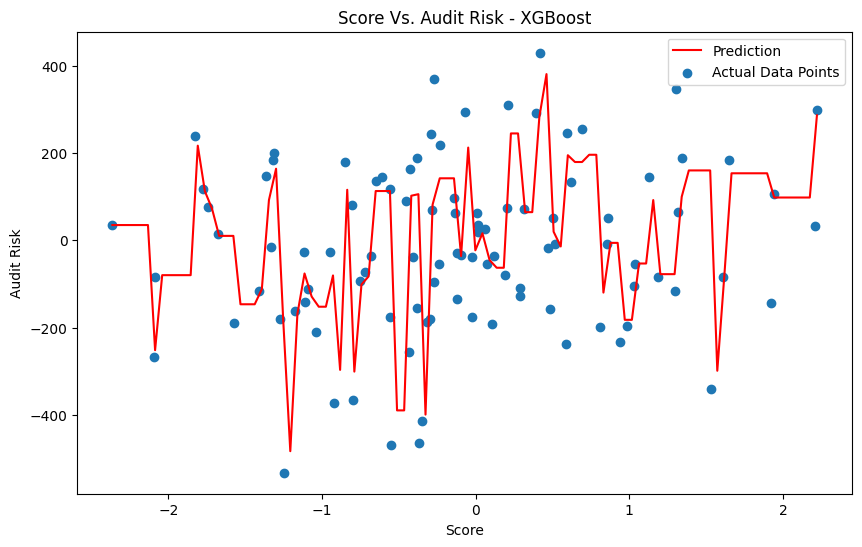

In [99]:
X_b = X_train[:100, 10].reshape(-1, 1)
y_b = y_train[:100]

best_xgb = XGBRegressor(max_depth=3, n_estimators=gs.best_params_['n_estimators'],
                        learning_rate=gs.best_params_['learning_rate'], random_state=42)
best_xgb.fit(X_b, y_b)

X_new = np.linspace(X_b.min(), X_b.max(), 100).reshape(-1, 1)
y_predict = best_xgb.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c='r', label='Prediction')
plt.scatter(X_b, y_b, label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk - XGBoost')
plt.show()

#SHAP

In [111]:
import shap
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes  # Use a valid dataset


In [112]:
# Load dataset (use any dataset suitable for regression)
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

print("✅ Model training completed.")


✅ Model training completed.


In [113]:
# Create SHAP Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=feature_names)

print("✅ SHAP values computed.")


✅ SHAP values computed.


Global Feature Importance (Summary Plot)

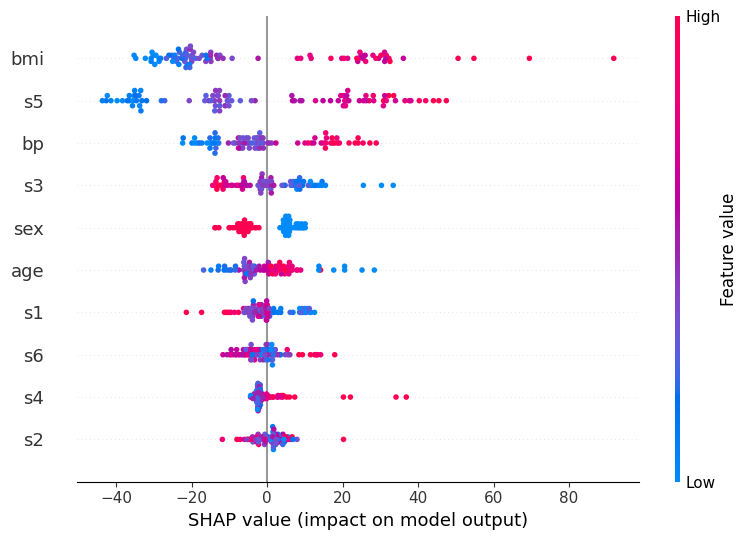

In [114]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


Feature Importance as Bar Chart

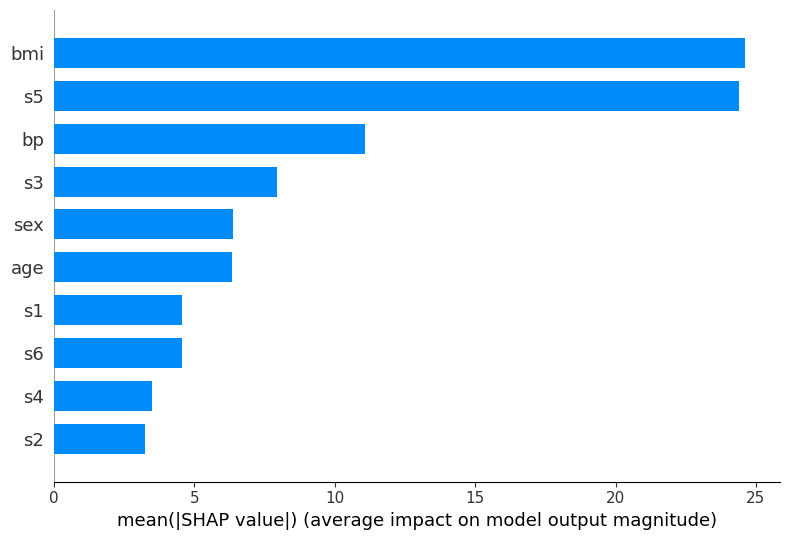

In [115]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)


Feature Interaction (Dependence Plot)

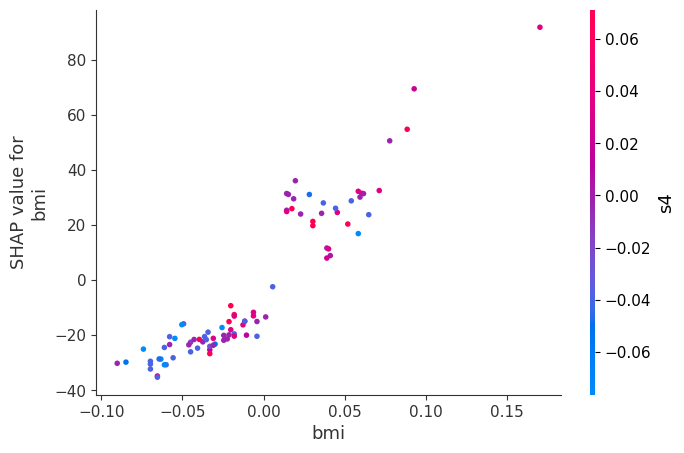

In [116]:
shap.dependence_plot("bmi", shap_values, X_test, feature_names=feature_names)


Force Plot (Explaining a Single Prediction)

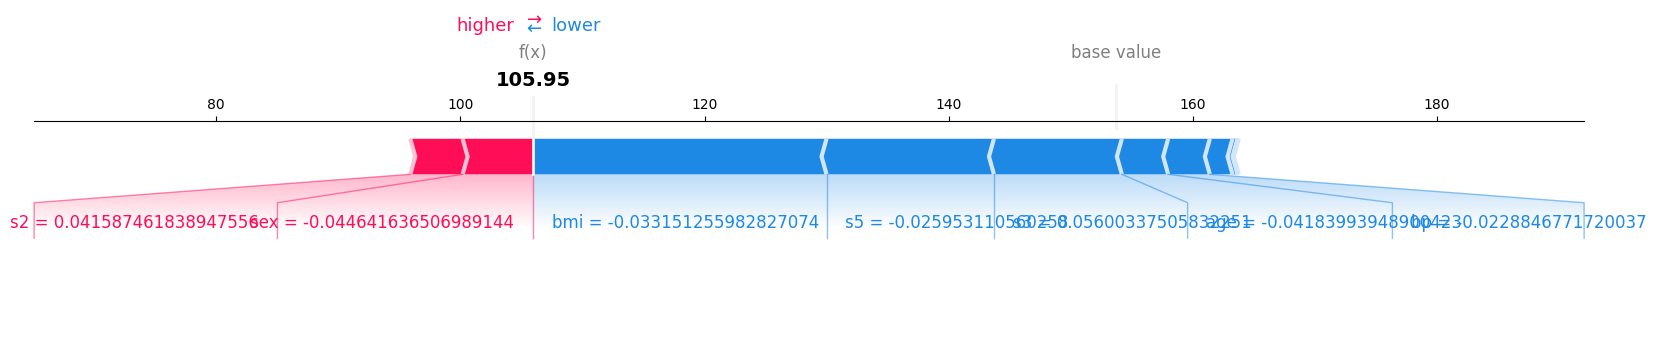

In [117]:
i = 10  # Choose a specific observation
shap.force_plot(explainer.expected_value, shap_values[i, :], X_test[i, :], feature_names=feature_names, matplotlib=True)


Waterfall Plot (Breakdown of Prediction)

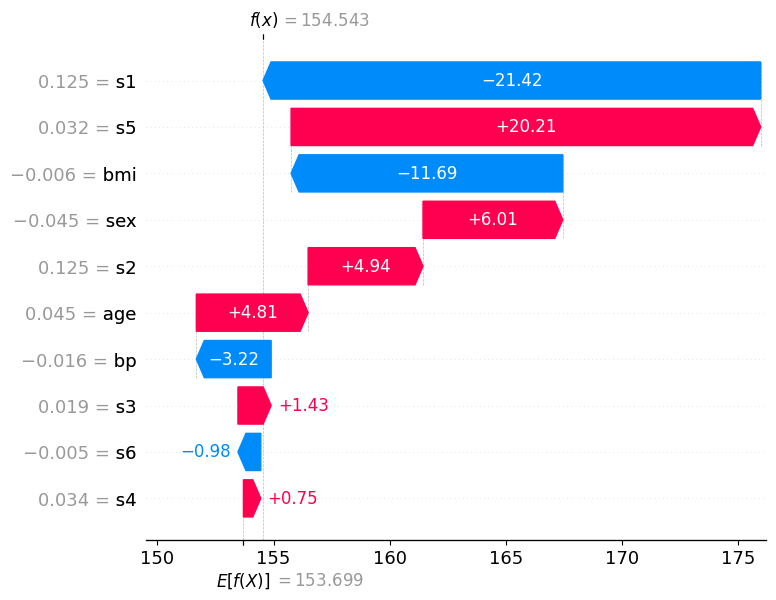

In [118]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test[0], feature_names=feature_names))


Decision Plot

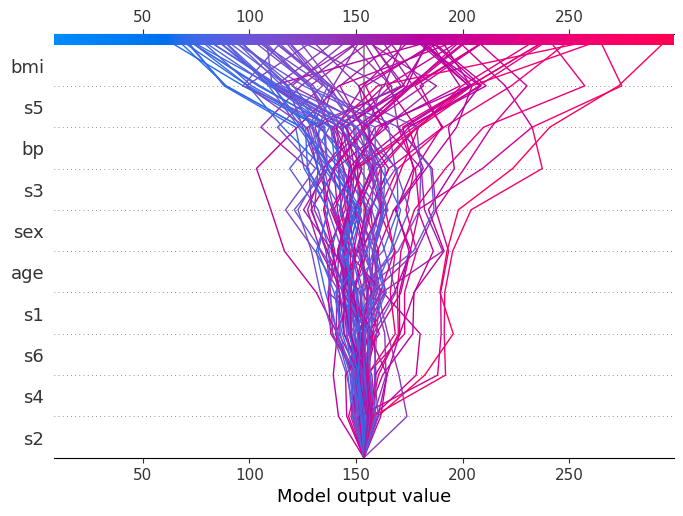

In [119]:
shap.decision_plot(explainer.expected_value, shap_values, feature_names=feature_names)
